In [17]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, balanced_accuracy_score, confusion_matrix,\
classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

## Preprocessing

In [18]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
video_game_sales_df = pd.read_csv('Resources/final_videoGameSales_df/final_videoGameSales_df.csv')

# Review the DataFrame
video_game_sales_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
# Assess data types
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  object 
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [20]:
# Split Year into just Year
video_game_sales_df['Year'] = video_game_sales_df['Year'].str.split('-').str[0]
video_game_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [21]:
video_game_sales_df['Year'] = video_game_sales_df['Year'].astype(int)
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [22]:
# Drop extra columns
cleaned_df = video_game_sales_df.drop(columns=['Rank', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
cleaned_df

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006,Sports,Nintendo,82.74
1,NES,1985,Platform,Nintendo,40.24
2,Wii,2008,Racing,Nintendo,35.82
3,Wii,2009,Sports,Nintendo,33.00
4,GB,1996,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16286,GBA,2002,Platform,Kemco,0.01
16287,GC,2003,Shooter,Infogrames,0.01
16288,PS2,2008,Racing,Activision,0.01
16289,DS,2010,Puzzle,7G//AMES,0.01


In [23]:
platform_names = cleaned_df['Platform'].value_counts()
platform_names

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [24]:
# Determine which values to replace if counts are less than or equal to 5.
names_to_replace = list(platform_names[platform_names < 200].index)

# Replace in dataframe
for app in names_to_replace:
    cleaned_df['Platform'] = cleaned_df['Platform'].replace(app,"Other")
    
# Check to make sure binning was successful
cleaned_df['Platform'].value_counts()


DS       2131
PS2      2127
PS3      1304
Wii      1290
X360     1234
PSP      1197
PS       1189
PC        938
XB        803
GBA       786
Other     737
GC        542
3DS       499
PSV       410
PS4       336
N64       316
SNES      239
XOne      213
Name: Platform, dtype: int64

In [25]:
publisher_names = cleaned_df['Publisher'].value_counts()
publisher_names[0:40]

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [26]:
# Determine which values to replace if counts are less than or equal to 5.
names_to_replace = list(publisher_names[publisher_names < 200].index)

# Replace in dataframe
for app in names_to_replace:
    cleaned_df['Publisher'] = cleaned_df['Publisher'].replace(app,"Other")
    
# Check to make sure binning was successful
cleaned_df['Publisher'].value_counts()

Other                                     6460
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Name: Publisher, dtype: int64

In [27]:
genre_names = cleaned_df['Genre'].value_counts()
genre_names

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

### Data Preprocessing

In [28]:
cleaned_df = pd.get_dummies(cleaned_df,columns=['Platform', 'Genre', 'Publisher'],drop_first=True)
print(cleaned_df.columns)
cleaned_df

Index(['Year', 'Global_Sales', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_N64', 'Platform_Other', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_SNES', 'Platform_Wii', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Publisher_Atari', 'Publisher_Capcom',
       'Publisher_Disney Interactive Studios', 'Publisher_Electronic Arts',
       'Publisher_Konami Digital Entertainment',
       'Publisher_Namco Bandai Games', 'Publisher_Nintendo', 'Publisher_Other',
       'Publisher_Sega', 'Publisher_Sony Computer Entertainment',
       'Publisher_Square Enix', 'Publisher_THQ',
       'Publisher_Take-Two Interactive', 'Publisher_Tecmo Koei',
       'Publisher_Ubisoft',
  

,Year,Global_Sales,Platform_DS,Platform_GBA,Platform_GC,Platform_N64,Platform_Other,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Nintendo,Publisher_Other,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Warner Bros. Interactive Entertainment
0,2006,82.74,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1985,40.24,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2008,35.82,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2009,33.00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1996,31.37,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,2002,0.01,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16287,2003,0.01,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16288,2008,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16289,2010,0.01,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Create an array for the dependent variable y with the sales data
y = cleaned_df["Global_Sales"]

# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = cleaned_df.drop('Global_Sales',axis=1)

In [30]:
# Train, test, split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(12218, 45)

## Linear Regression 

In [31]:
# Create a model with scikit-learn
lr_model = LinearRegression()

In [32]:
# Fit the data into the model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
# Display the slope
print(f"Model's slope: {lr_model.coef_}")

Model's slope: [-0.26149652 -0.01906057 -0.10506143 -0.09361368 -0.08206718 -0.06414239
 -0.02210922 -0.05844433  0.01344708  0.10326395  0.08909577 -0.02052464
  0.01684937 -0.05784586  0.07144997  0.11703276 -0.07121954  0.05240732
 -0.05952573  0.00730881 -0.041686    0.0387603  -0.04798455  0.00203778
  0.01323583  0.03179748 -0.0166179  -0.0322852  -0.05148245 -0.04785279
 -0.03341712 -0.01131332  0.03357144 -0.07710429 -0.08516786  0.389255
 -0.18434381 -0.05187321  0.02148645 -0.01733343 -0.03547775  0.0491637
 -0.0766517  -0.03820671  0.00372953]


In [34]:
# Display the y-intercept
print(f"Model's y-intercept: {lr_model.intercept_}")

Model's y-intercept: 0.536686855459154


In [35]:
# Make predictions using the X training set
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_train

array([0.72411753, 0.6274566 , 0.64726478, ..., 0.48253974, 0.33097668,
       1.13211157])

In [36]:
# Make predictions using the X testing set
y_pred_test = lr_model.predict(X_test_scaled)
y_pred_test

array([2.39521745, 0.63494565, 2.71711802, ..., 0.74682751, 0.94249617,
       0.519562  ])

In [37]:
# Compute the metrics for the linear regression model - TESTING
score_test = lr_model.score(X_test_scaled, y_test, sample_weight=None)
score_train = lr_model.score(X_train_scaled, y_train, sample_weight=None)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)


# Print relevant metrics.

print(f"The training score is {score_train}.")
print(f"The testing score is {score_test}.")

print(f"The training r2 is {r2_train}.")
print(f"The testing r2 is {r2_test}.")

The training score is 0.11521670605656165.
The testing score is 0.1547062230816595.
The training r2 is 0.11521670605656165.
The testing r2 is 0.1547062230816595.


## Time Series with Logistic Regression 

In [38]:
# Copy DataFrame
time_df_vgsales = video_game_sales_df.copy(deep=True)
time_df_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [39]:
# Assess data types
time_df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [40]:
# Convert Year data type from float to int
time_df_vgsales['Year'] = pd.to_datetime(time_df_vgsales['Year'], format='%Y')

time_df_vgsales.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [41]:
# Drop columns to compare date and NA Sales
global_vgsales = time_df_vgsales.drop(columns=['Rank', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 
                                               'EU_Sales', 'JP_Sales','Other_Sales'
                                              ])
global_vgsales

,Year,Global_Sales
0,2006-01-01,82.74
1,1985-01-01,40.24
2,2008-01-01,35.82
3,2009-01-01,33.00
4,1996-01-01,31.37
...,...,...
16286,2002-01-01,0.01
16287,2003-01-01,0.01
16288,2008-01-01,0.01
16289,2010-01-01,0.01


In [42]:
# Set Index as 'Year' and sort from earliest to latest date
global_vgsales_sorted = global_vgsales.sort_values(by='Year')

global_vgsales = global_vgsales_sorted.set_index('Year')
global_vgsales

,Global_Sales
Year,
1980-01-01,4.31
1980-01-01,0.27
1980-01-01,1.05
1980-01-01,0.34
1980-01-01,1.15
...,...
2016-01-01,0.35
2017-01-01,0.03
2017-01-01,0.01


In [43]:
# Place ordered Year column
global_vgsales['Year'] = np.arange(len(global_vgsales.index))
global_vgsales.head()

,Global_Sales,Year
Year,,
1980-01-01,4.31,0
1980-01-01,0.27,1
1980-01-01,1.05,2
1980-01-01,0.34,3
1980-01-01,1.15,4


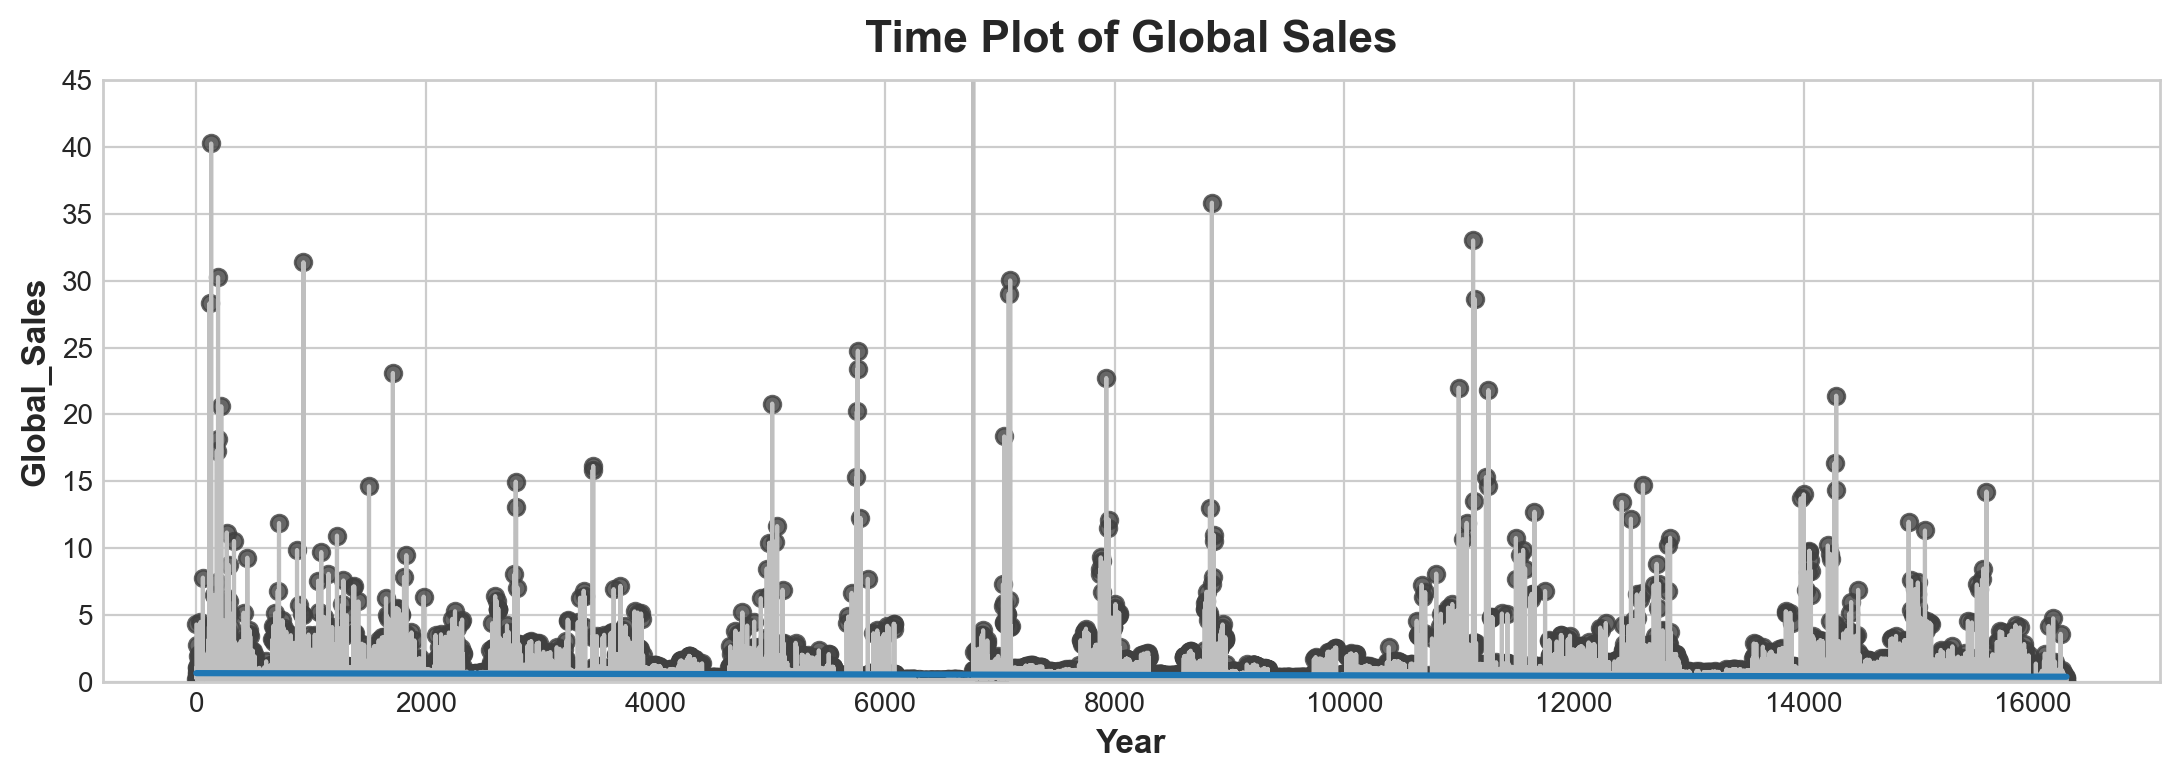

In [44]:
# Plot Global Sales
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Year', 'Global_Sales', data=global_vgsales, color='0.75')
ax = sns.regplot(x='Year', y='Global_Sales', data=global_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax.set(ylim=(0, 45));
ax.set_title('Time Plot of Global Sales');

In [45]:
# Training data
X_global = global_vgsales.loc[:, ['Year']]  # features
y_global = global_vgsales.loc[:, 'Global_Sales']  # target

In [46]:
# Create a model with scikit-learn
time_model_global = LinearRegression()

time_model_global.fit(X_global, y_global)

LinearRegression()

In [47]:
y_pred = pd.Series(time_model_global.predict(X_global), index=X_global.index)

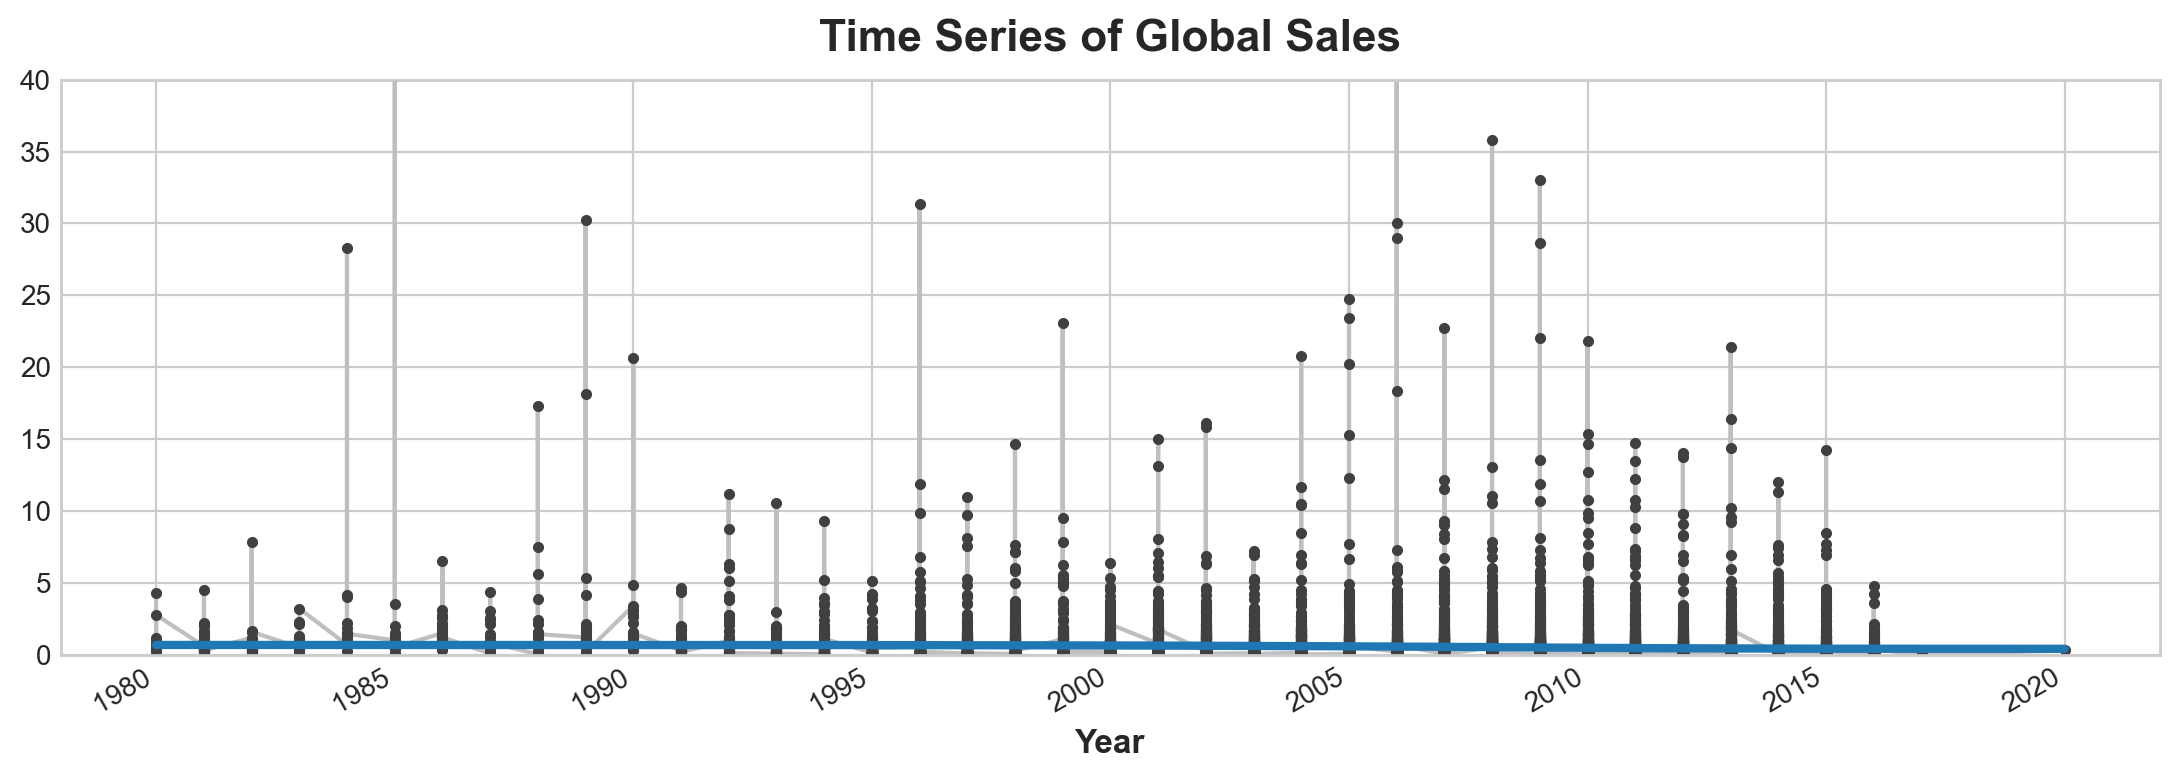

In [48]:
ax = y_global.plot(**plot_params)    
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set(ylim=(0, 40))
ax.set_title('Time Series of Global Sales');

### Regional Sales of `Action` Genre - Time Series with Linear Regression 

In [49]:
actionGenre_timeDf_vgsales = video_game_sales_df.copy(deep=True)
actionGenre_timeDf_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [50]:
actionGenre_vgsales = actionGenre_timeDf_vgsales.loc[actionGenre_timeDf_vgsales['Genre'] == 'Action']
actionGenre_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16257,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16260,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16275,16585,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01
16276,16586,Carmageddon 64,N64,1999,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [51]:
# Drop columns to compare date and NA Sales
actionGenre_vgsales = actionGenre_vgsales.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 
                                               'Other_Sales'
                                              ])
actionGenre_vgsales

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
16,17,2013,7.01,9.27,0.97,21.40
17,18,2004,9.43,0.40,0.41,20.81
23,24,2013,9.63,5.31,0.06,16.38
24,25,2002,8.41,5.49,0.47,16.15
38,39,2001,6.99,4.51,0.30,13.10
...,...,...,...,...,...,...
16257,16567,2007,0.01,0.00,0.00,0.01
16260,16570,2014,0.00,0.00,0.01,0.01
16275,16585,2001,0.01,0.00,0.00,0.01
16276,16586,1999,0.01,0.00,0.00,0.01


In [52]:
# Set Index as 'Year' and sort from earliest to latest date
actionGenre_sorted = actionGenre_vgsales.sort_values(by='Year')

actionGenre_vgsales = actionGenre_sorted.set_index('Year')
actionGenre_vgsales

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,,,,,
1980,5368,0.32,0.02,0.00,0.34
1981,4017,0.46,0.03,0.00,0.50
1981,5129,0.35,0.02,0.00,0.37
1981,5248,0.33,0.02,0.00,0.36
1981,5391,0.32,0.02,0.00,0.34
...,...,...,...,...,...
2016,9440,0.00,0.00,0.13,0.13
2016,9540,0.00,0.00,0.13,0.13
2016,13888,0.00,0.00,0.04,0.04


In [53]:
actionGenre_vgsales['Year'] = np.arange(len(actionGenre_vgsales.index))
actionGenre_vgsales.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Year
Year,,,,,,
1980,5368,0.32,0.02,0.0,0.34,0
1981,4017,0.46,0.03,0.0,0.50,1
1981,5129,0.35,0.02,0.0,0.37,2
1981,5248,0.33,0.02,0.0,0.36,3
1981,5391,0.32,0.02,0.0,0.34,4


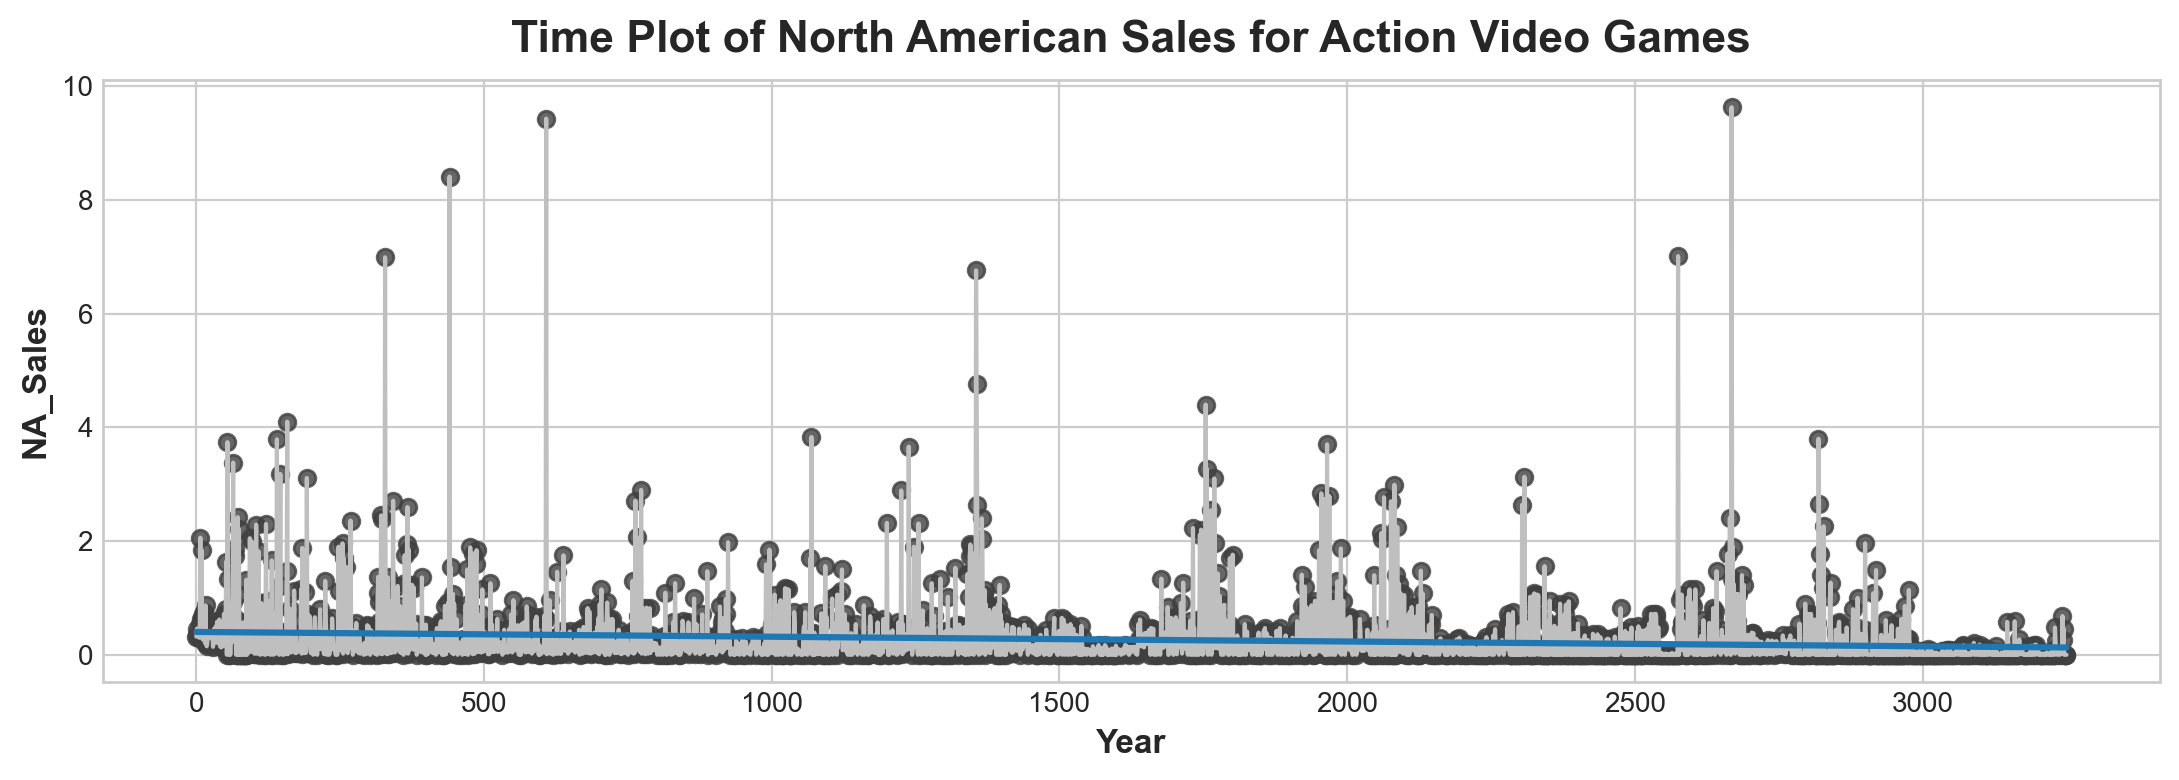

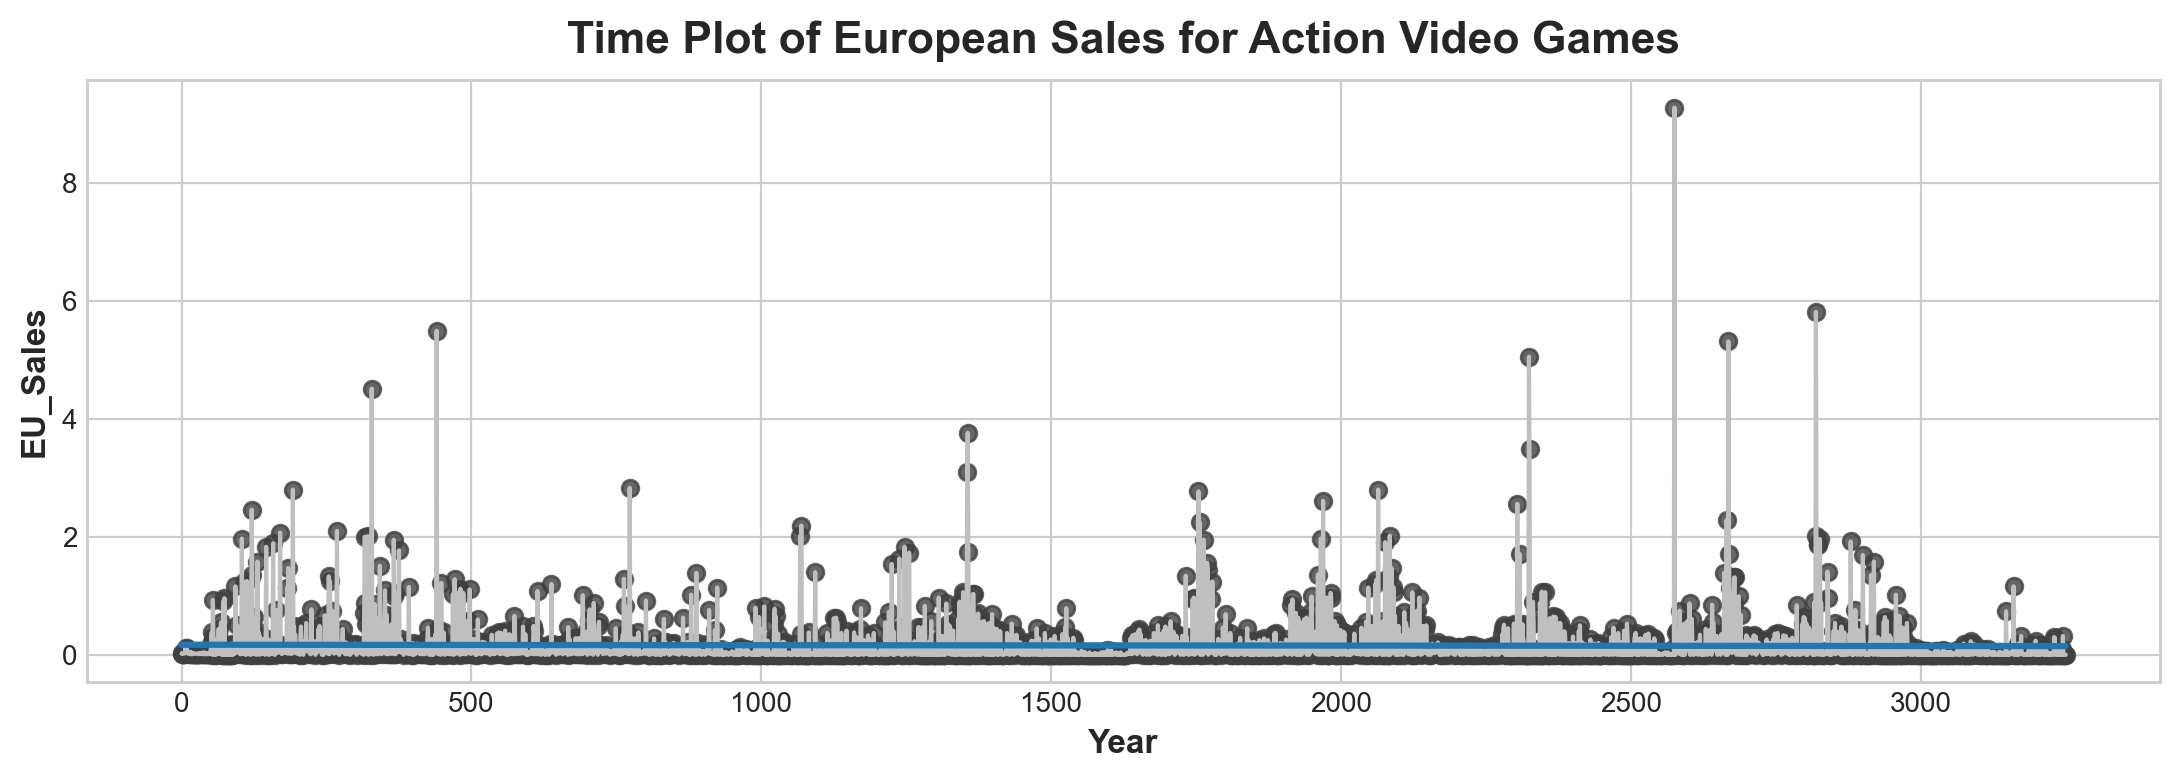

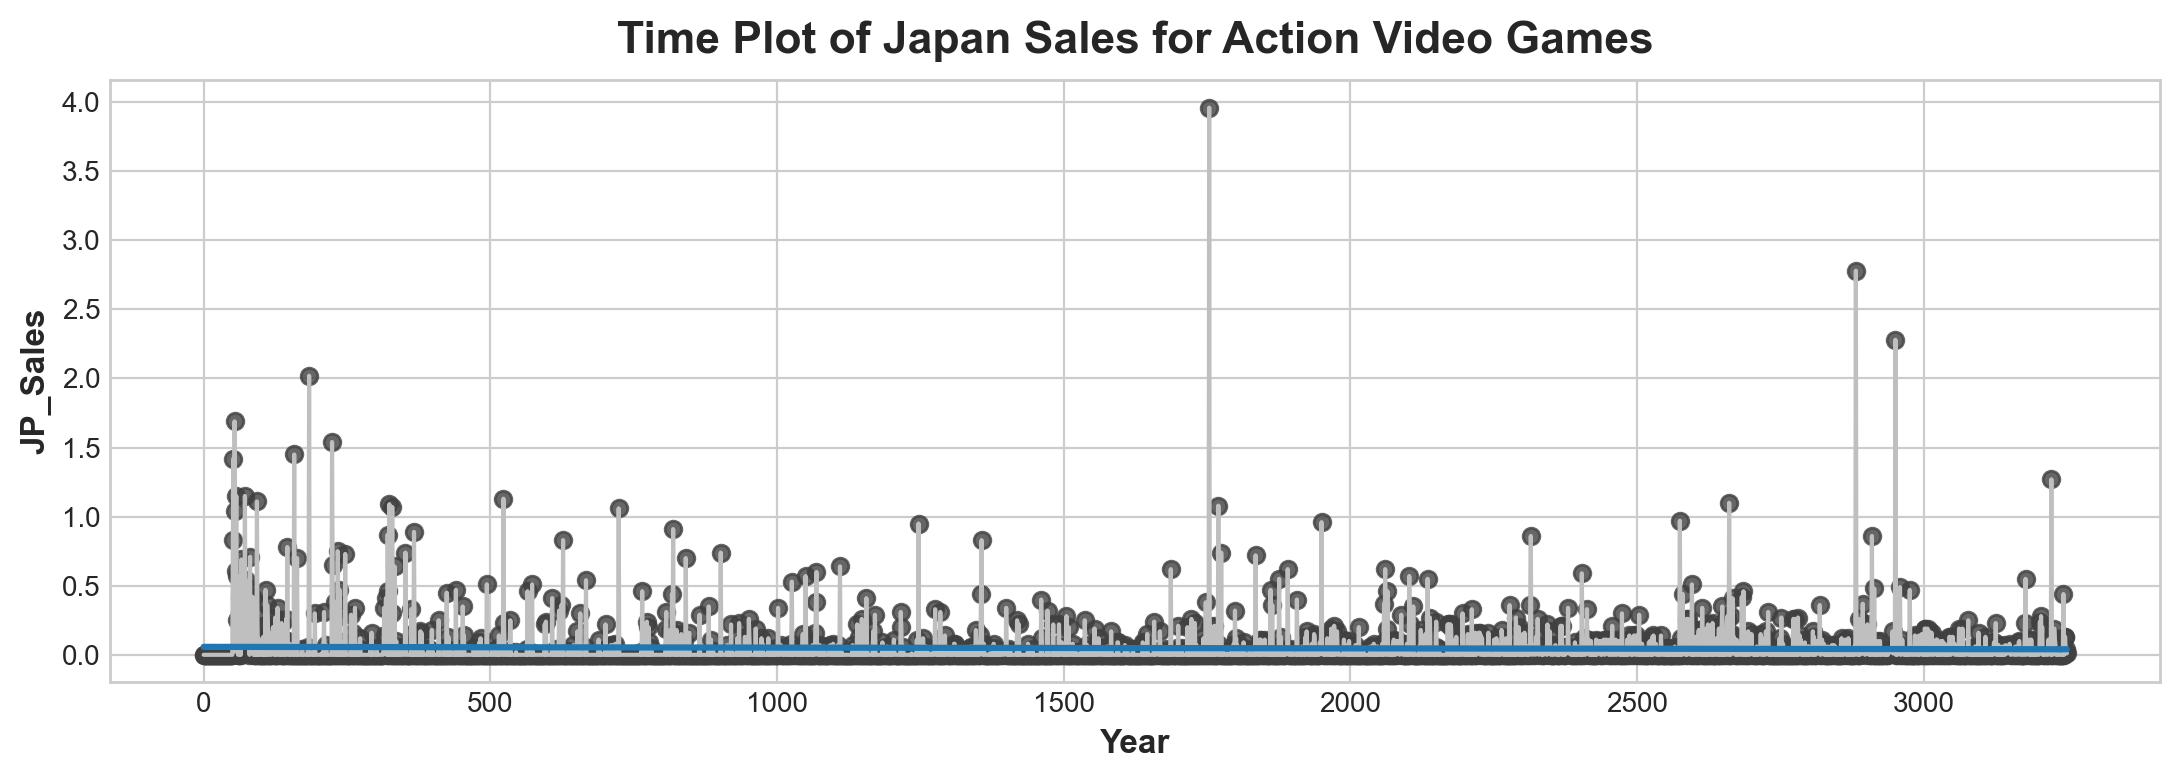

In [54]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

fig, ax_NA = plt.subplots()
ax_NA.plot('Year', 'NA_Sales', data=actionGenre_vgsales, color='0.75')
ax_NA = sns.regplot(x='Year', y='NA_Sales', data=actionGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_NA.set_title('Time Plot of North American Sales for Action Video Games');

fig, ax_EU = plt.subplots()
ax_EU.plot('Year', 'EU_Sales', data=actionGenre_vgsales, color='0.75')
ax_EU = sns.regplot(x='Year', y='EU_Sales', data=actionGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_EU.set_title('Time Plot of European Sales for Action Video Games');

fig, ax_JP = plt.subplots()
ax_JP.plot('Year', 'JP_Sales', data=actionGenre_vgsales, color='0.75')
ax_JP = sns.regplot(x='Year', y='JP_Sales', data=actionGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_JP.set_title('Time Plot of Japan Sales for Action Video Games');

In [55]:
# Create features and targets for each region
X_actionNA = actionGenre_vgsales.loc[:, ['Year']]  # features
y_actionNA = actionGenre_vgsales.loc[:, 'NA_Sales']  # target

X_actionEU = actionGenre_vgsales.loc[:, ['Year']]  # features
y_actionEU = actionGenre_vgsales.loc[:, 'EU_Sales']  # target

X_actionJP = actionGenre_vgsales.loc[:, ['Year']]  # features
y_actionJP = actionGenre_vgsales.loc[:, 'JP_Sales']  # target

In [56]:
# Train the model for each region
actionModel_NA = LinearRegression()
actionModel_NA.fit(X_actionNA, y_actionNA)

actionModel_EU = LinearRegression()
actionModel_EU.fit(X_actionEU, y_actionEU)

actionModel_JP = LinearRegression()
actionModel_JP.fit(X_actionJP, y_actionJP)

LinearRegression()

In [57]:
# Make predictions for each region
yNA_actionPred = pd.Series(actionModel_NA.predict(X_actionNA), index=X_actionNA.index)

yEU_actionPred = pd.Series(actionModel_EU.predict(X_actionEU), index=X_actionEU.index)

yJP_actionPred = pd.Series(actionModel_JP.predict(X_actionJP), index=X_actionJP.index)

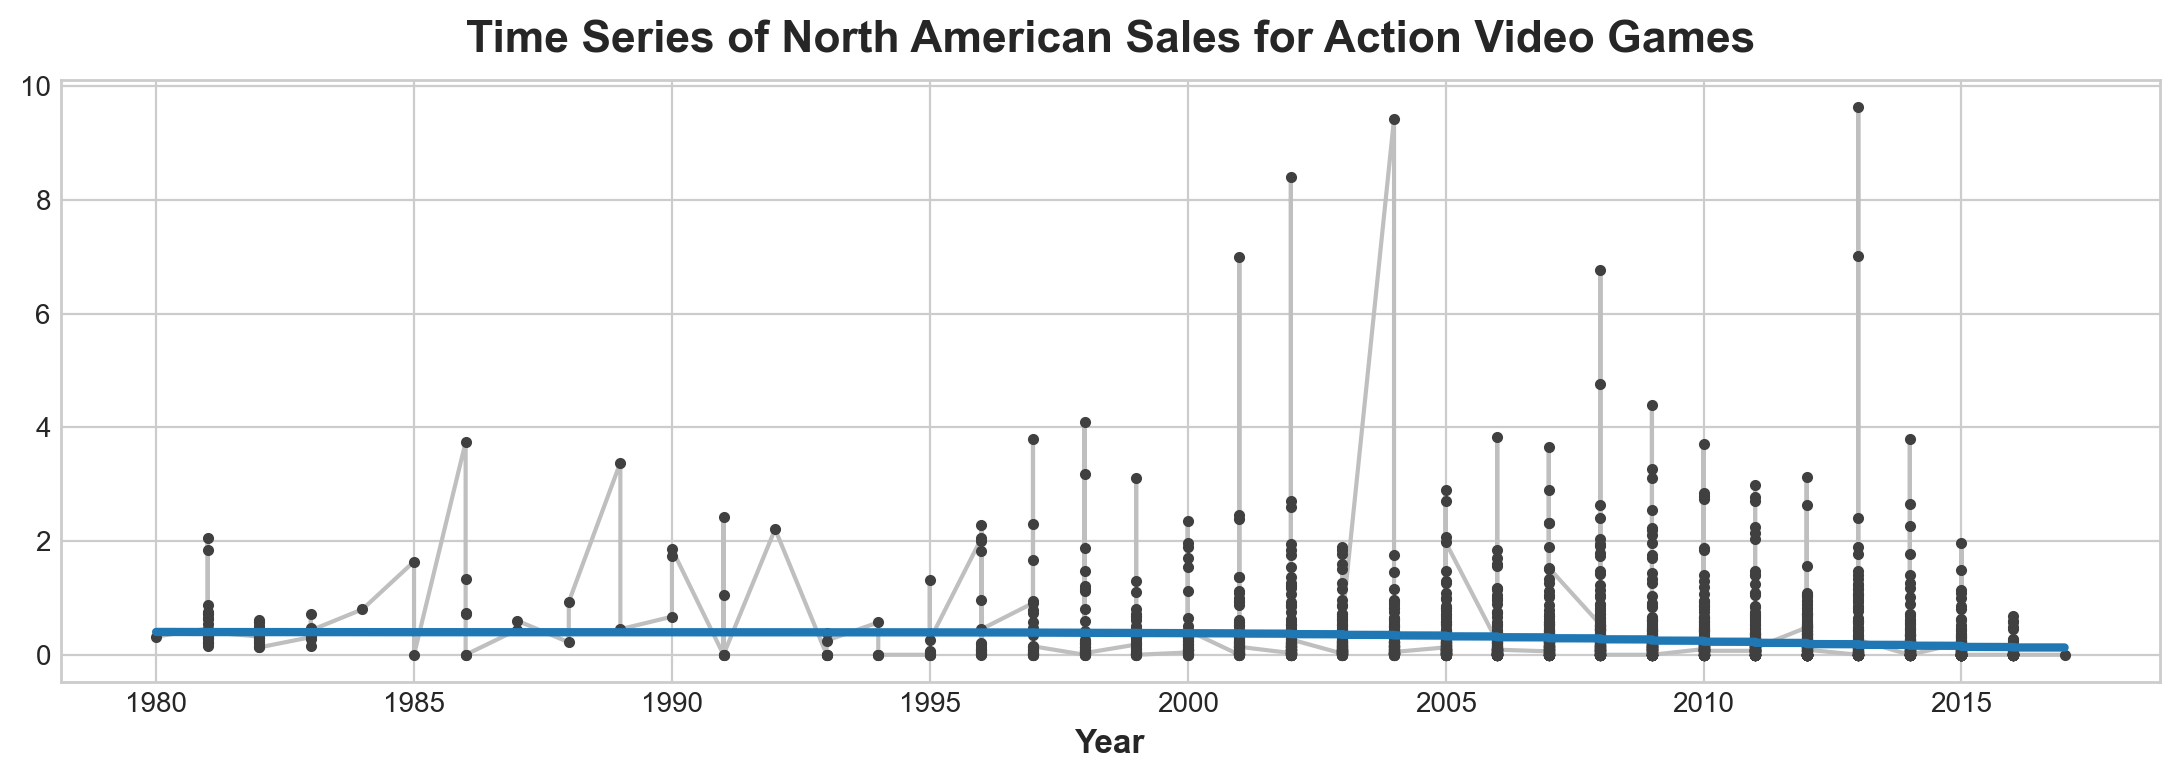

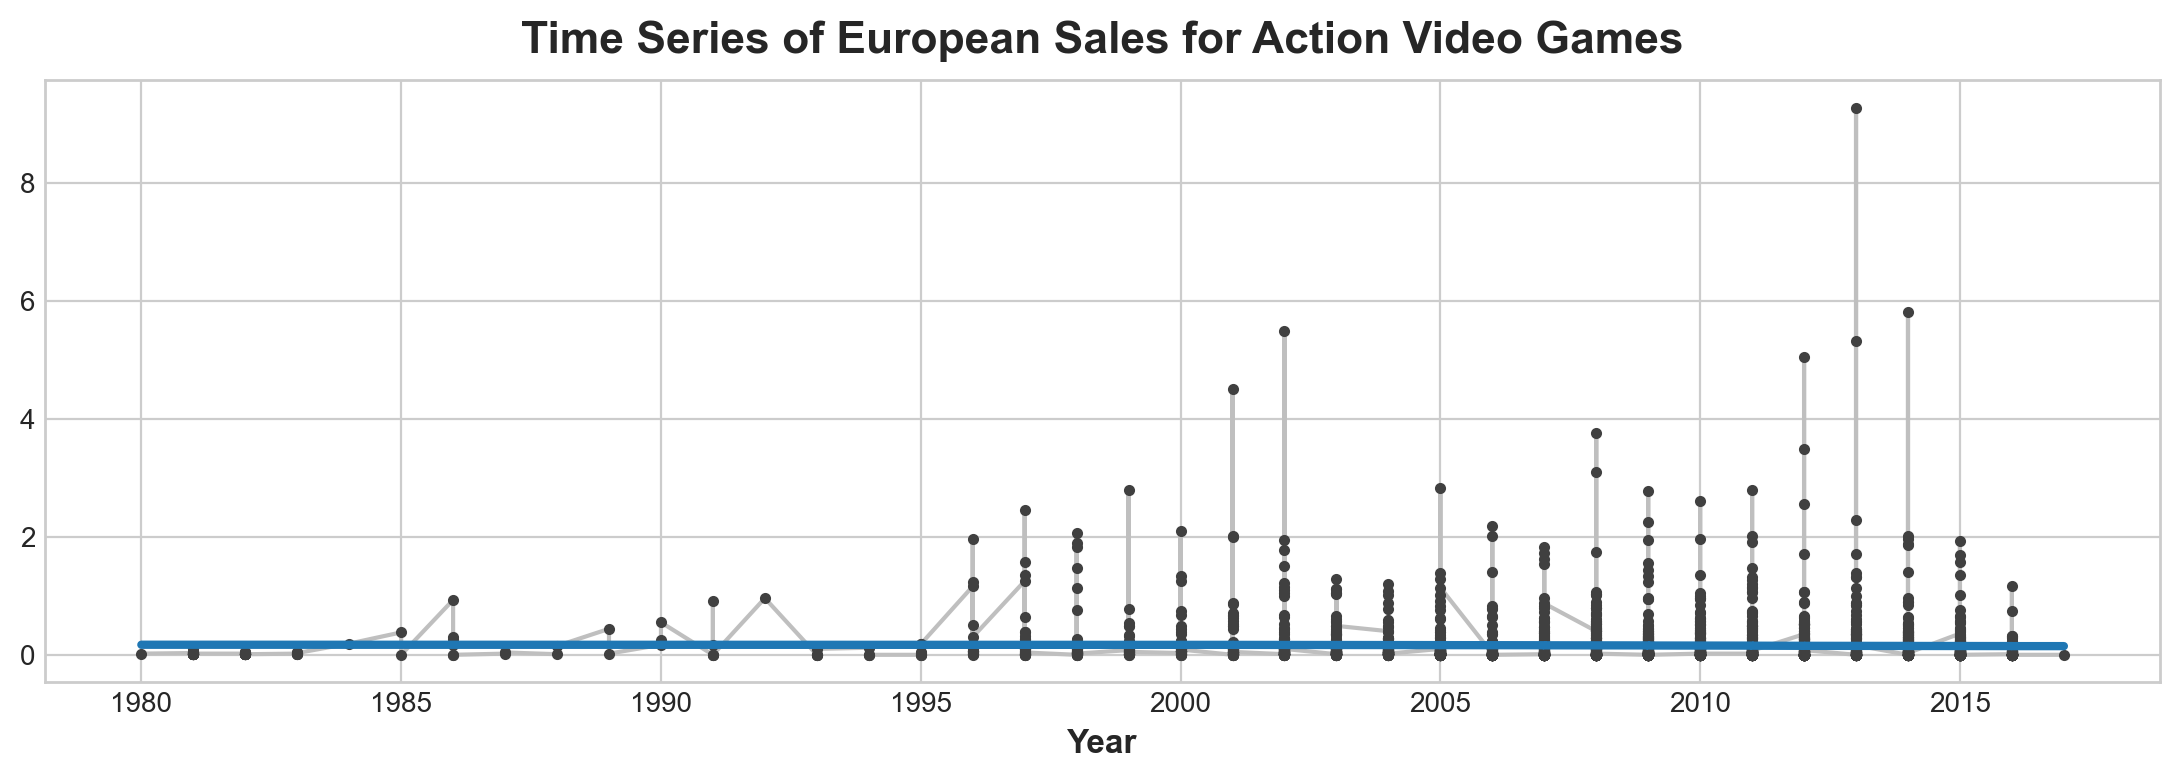

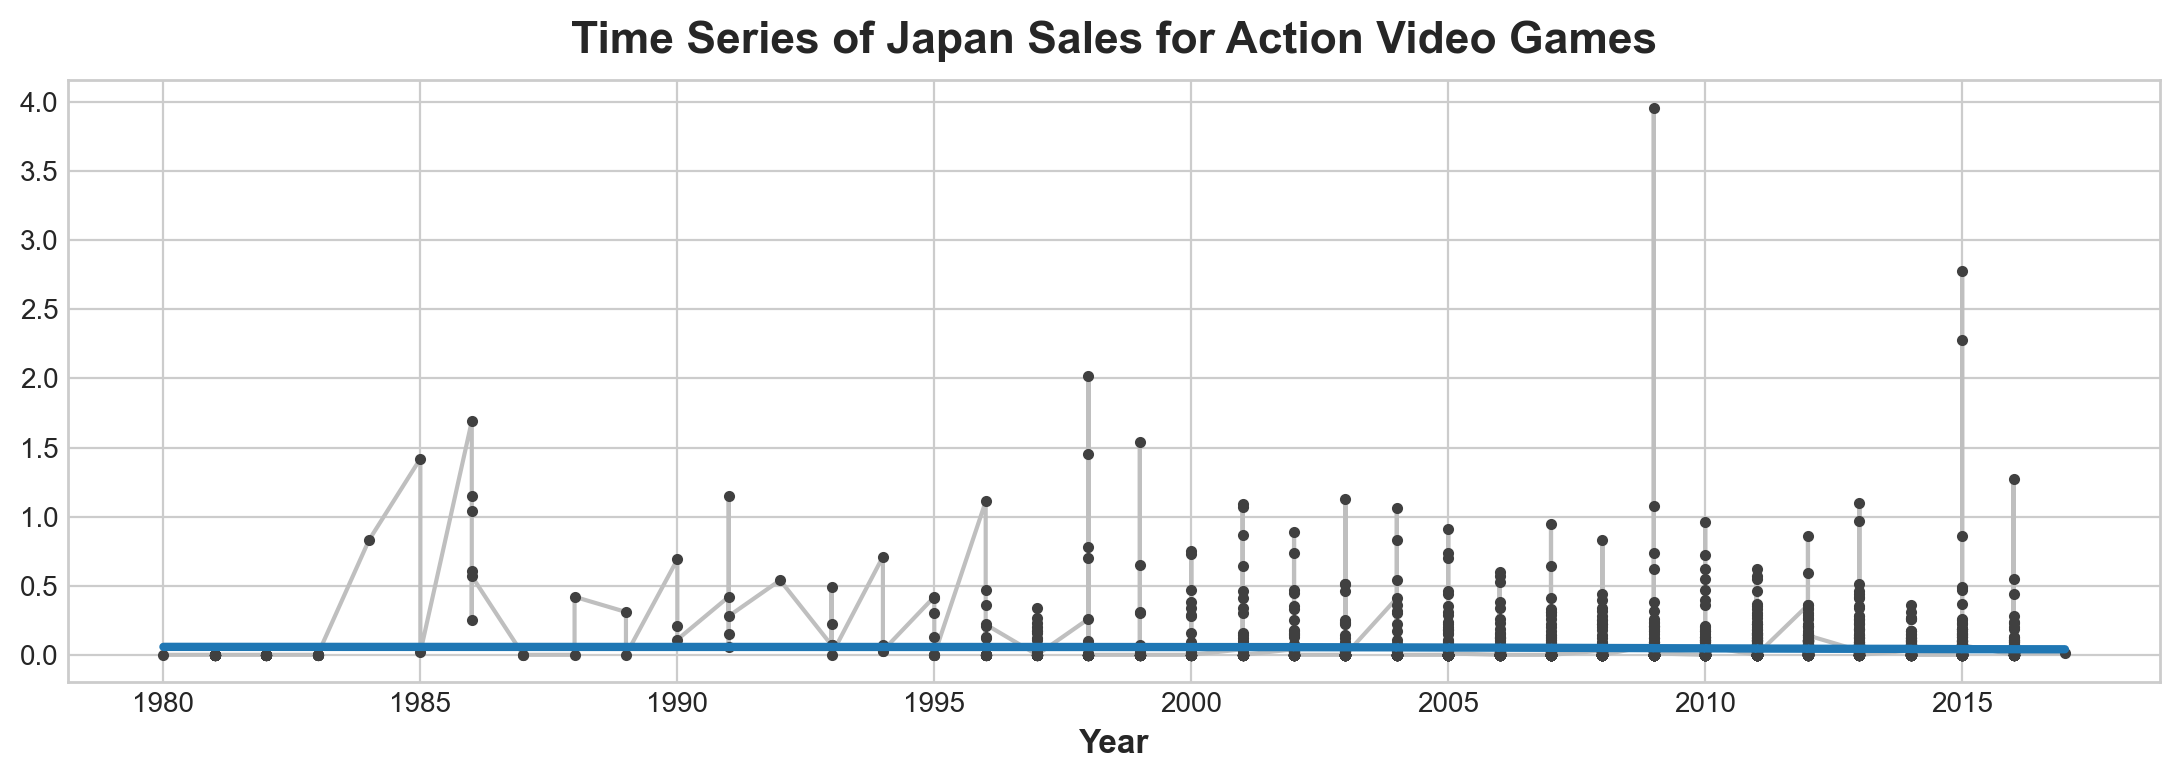

In [58]:
fig, ax_NA = plt.subplots()
ax_NA = y_actionNA.plot(**plot_params)
ax_NA = yNA_actionPred.plot(ax=ax_NA, linewidth=3)
ax_NA.set_title('Time Series of North American Sales for Action Video Games');

fig, ax_EU = plt.subplots()
ax_EU = y_actionEU.plot(**plot_params)
ax_EU = yEU_actionPred.plot(ax=ax_EU, linewidth=3)
ax_EU.set_title('Time Series of European Sales for Action Video Games');

fig, ax_JP = plt.subplots()
ax_JP = y_actionJP.plot(**plot_params)
ax_JP = yJP_actionPred.plot(ax=ax_JP, linewidth=3)
ax_JP.set_title('Time Series of Japan Sales for Action Video Games');

## Regional Sales of `Sports` Genre - Time Series with Linear Regression

In [59]:
sportsGenre_timeDf_vgsales = video_game_sales_df.copy(deep=True)
sportsGenre_timeDf_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [60]:
sportsGenre_vgsales = sportsGenre_timeDf_vgsales.loc[sportsGenre_timeDf_vgsales['Genre'] == 'Sports']
sportsGenre_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16269,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16271,16581,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16272,16582,PGA European Tour,N64,2000,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16274,16584,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [61]:
# Drop columns to compare date and sales
sportsGenre_vgsales = sportsGenre_vgsales.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 
                                               'Other_Sales'
                                              ])
sportsGenre_vgsales

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,2006,41.49,29.02,3.77,82.74
3,4,2009,15.75,11.01,3.28,33.00
13,14,2007,8.94,8.03,3.60,22.72
14,15,2009,9.09,8.59,2.53,22.00
77,78,2015,1.11,6.06,0.06,8.49
...,...,...,...,...,...,...
16269,16579,2016,0.00,0.01,0.00,0.01
16271,16581,2011,0.01,0.00,0.00,0.01
16272,16582,2000,0.01,0.00,0.00,0.01
16274,16584,2011,0.00,0.01,0.00,0.01


In [62]:
# Set Index as 'Year' and sort from earliest to latest date
sportsGenre_sorted = sportsGenre_vgsales.sort_values(by='Year')

sportsGenre_vgsales = sportsGenre_sorted.set_index('Year')
sportsGenre_vgsales

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,,,,,
1980,4027,0.46,0.03,0.00,0.49
1981,6539,0.24,0.01,0.00,0.26
1981,7373,0.20,0.01,0.00,0.21
1981,9497,0.12,0.01,0.00,0.13
1981,7906,0.18,0.01,0.00,0.19
...,...,...,...,...,...
2016,15467,0.00,0.02,0.00,0.02
2016,13494,0.00,0.04,0.00,0.04
2016,13883,0.00,0.03,0.00,0.04


In [63]:
sportsGenre_vgsales['Year'] = np.arange(len(sportsGenre_vgsales.index))
sportsGenre_vgsales.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Year
Year,,,,,,
1980,4027,0.46,0.03,0.0,0.49,0
1981,6539,0.24,0.01,0.0,0.26,1
1981,7373,0.20,0.01,0.0,0.21,2
1981,9497,0.12,0.01,0.0,0.13,3
1981,7906,0.18,0.01,0.0,0.19,4


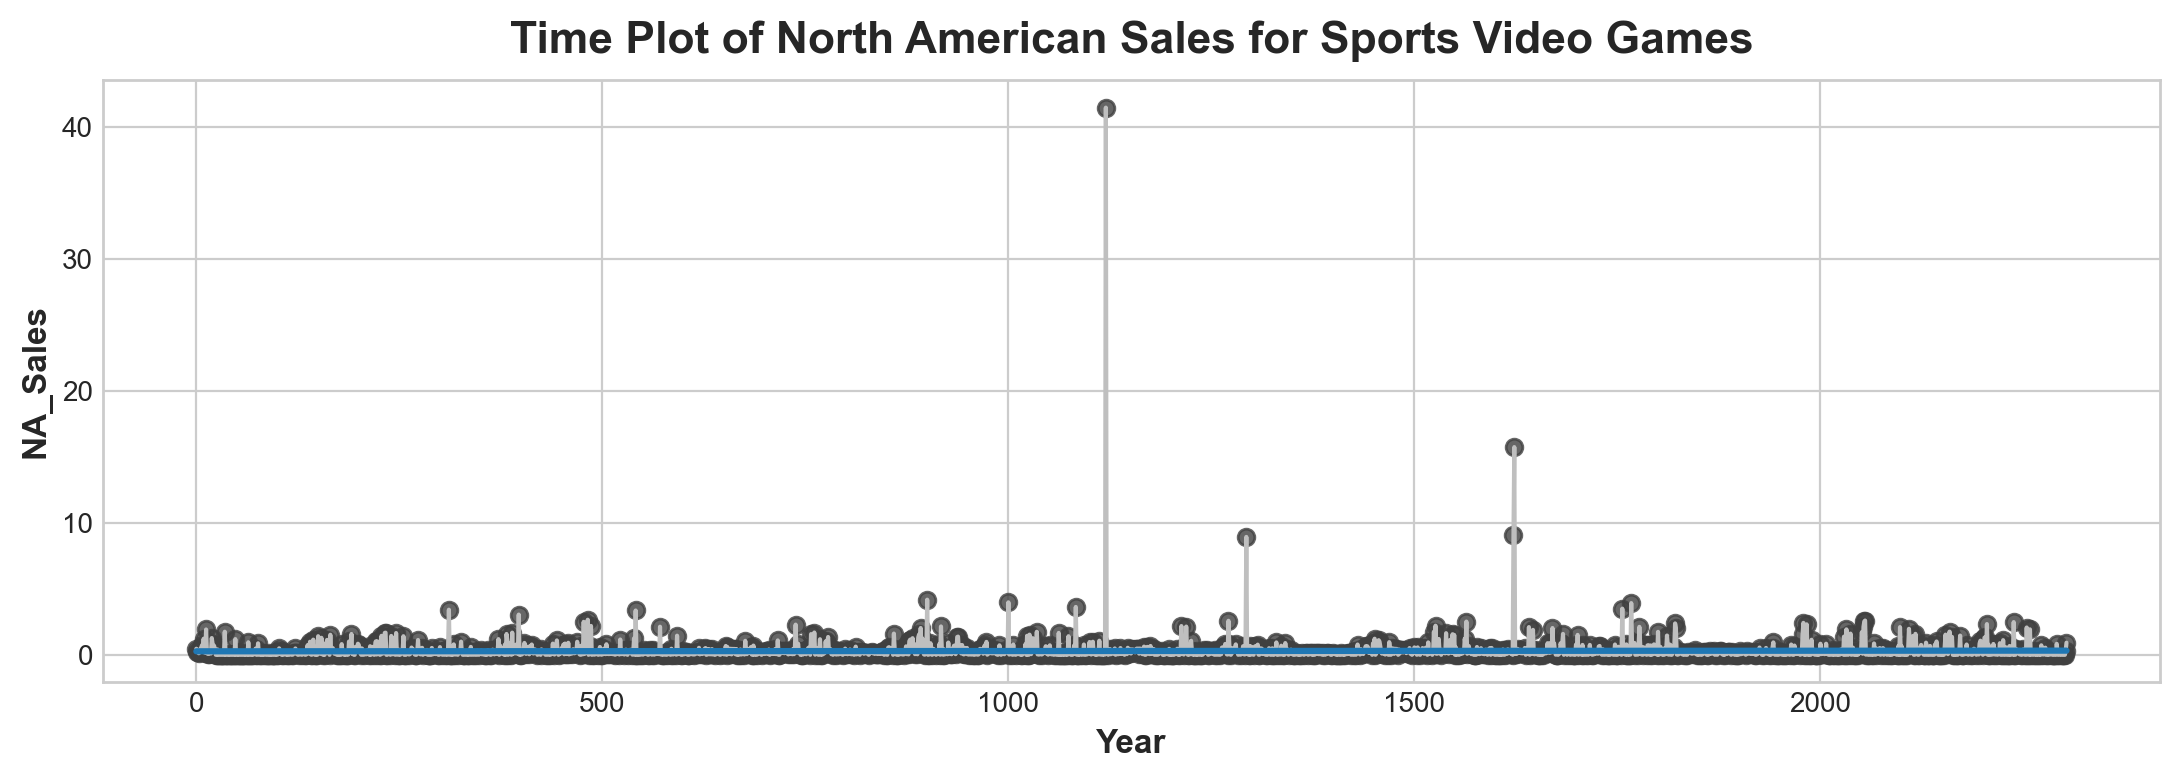

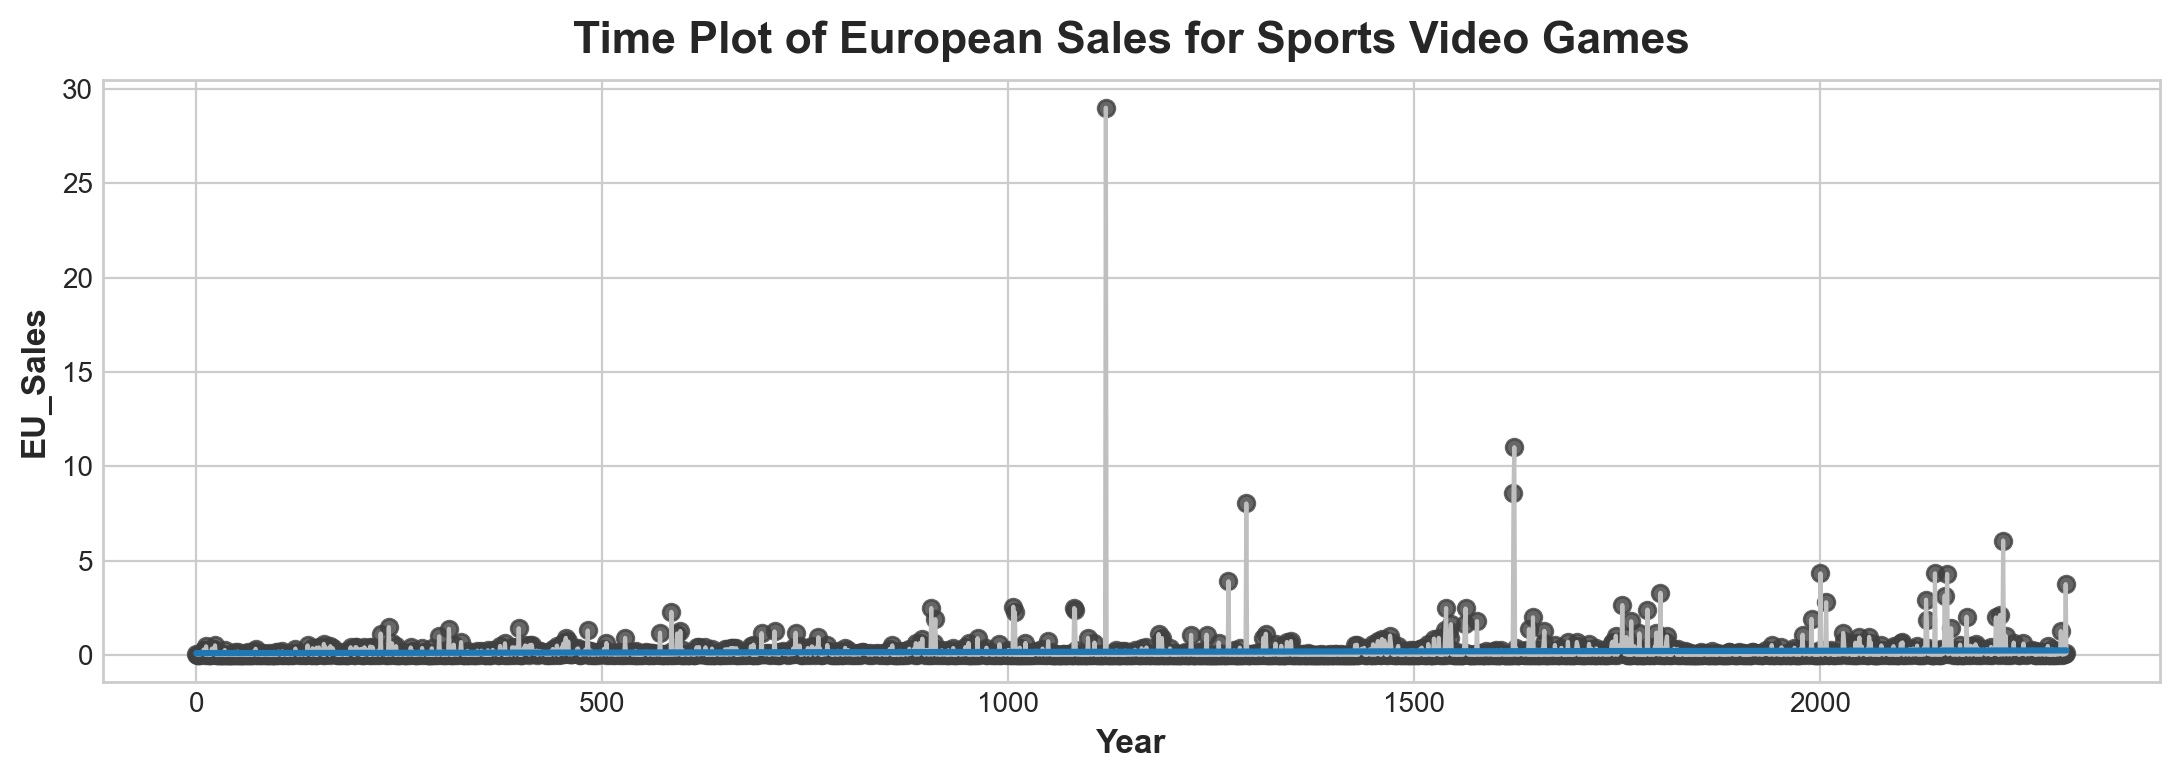

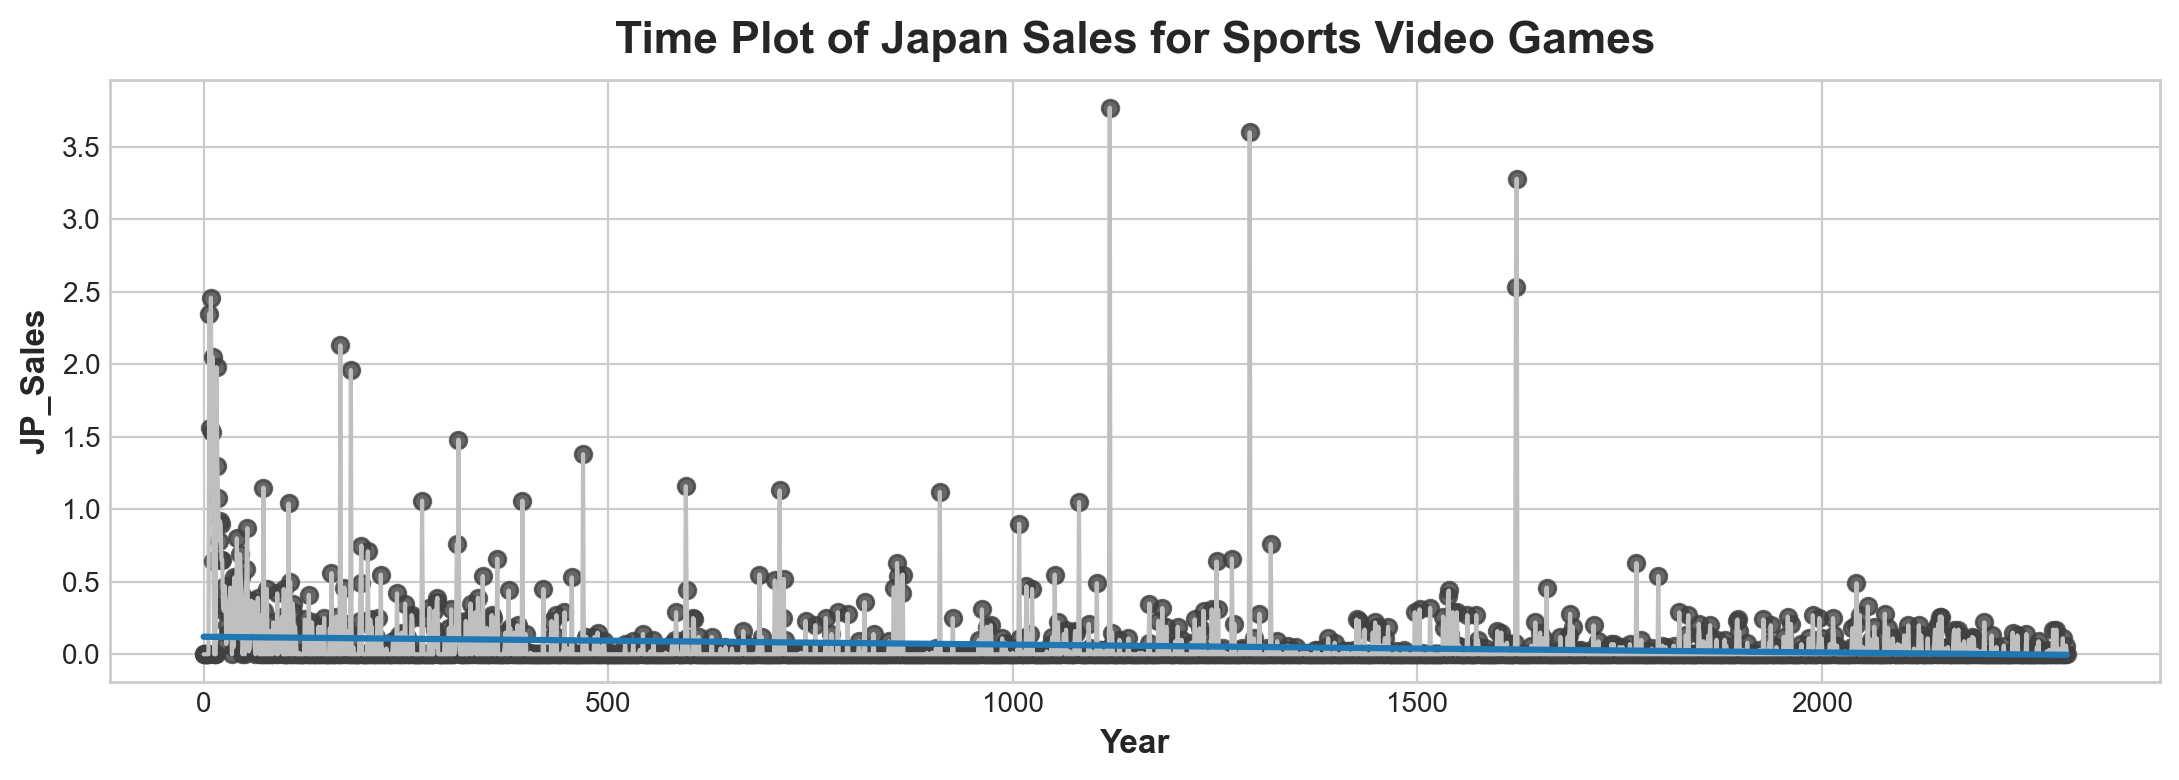

In [64]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

fig, ax_NA = plt.subplots()
ax_NA.plot('Year', 'NA_Sales', data=sportsGenre_vgsales, color='0.75')
ax_NA = sns.regplot(x='Year', y='NA_Sales', data=sportsGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_NA.set_title('Time Plot of North American Sales for Sports Video Games');

fig, ax_EU = plt.subplots()
ax_EU.plot('Year', 'EU_Sales', data=sportsGenre_vgsales, color='0.75')
ax_EU = sns.regplot(x='Year', y='EU_Sales', data=sportsGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_EU.set_title('Time Plot of European Sales for Sports Video Games');

fig, ax_JP = plt.subplots()
ax_JP.plot('Year', 'JP_Sales', data=sportsGenre_vgsales, color='0.75')
ax_JP = sns.regplot(x='Year', y='JP_Sales', data=sportsGenre_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_JP.set_title('Time Plot of Japan Sales for Sports Video Games');

In [65]:
# Create features and targets for each region
X_sportsNA = sportsGenre_vgsales.loc[:, ['Year']]  # features
y_sportsNA = sportsGenre_vgsales.loc[:, 'NA_Sales']  # target

X_sportsEU = sportsGenre_vgsales.loc[:, ['Year']]  # features
y_sportsEU = sportsGenre_vgsales.loc[:, 'EU_Sales']  # target

X_sportsJP = sportsGenre_vgsales.loc[:, ['Year']]  # features
y_sportsJP = sportsGenre_vgsales.loc[:, 'JP_Sales']  # target

In [66]:
# Train the model for each region
sportsmodel_NA = LinearRegression()
sportsmodel_NA.fit(X_sportsNA, y_sportsNA)

sportsmodel_EU = LinearRegression()
sportsmodel_EU.fit(X_sportsEU, y_sportsEU)

sportsmodel_JP = LinearRegression()
sportsmodel_JP.fit(X_sportsJP, y_sportsJP)

LinearRegression()

In [67]:
# Make predictions for each region
yNA_sportspred = pd.Series(sportsmodel_NA.predict(X_sportsNA), index=X_sportsNA.index)

yEU_sportspred = pd.Series(sportsmodel_EU.predict(X_sportsEU), index=X_sportsEU.index)

yJP_sportspred = pd.Series(sportsmodel_JP.predict(X_sportsJP), index=X_sportsJP.index)

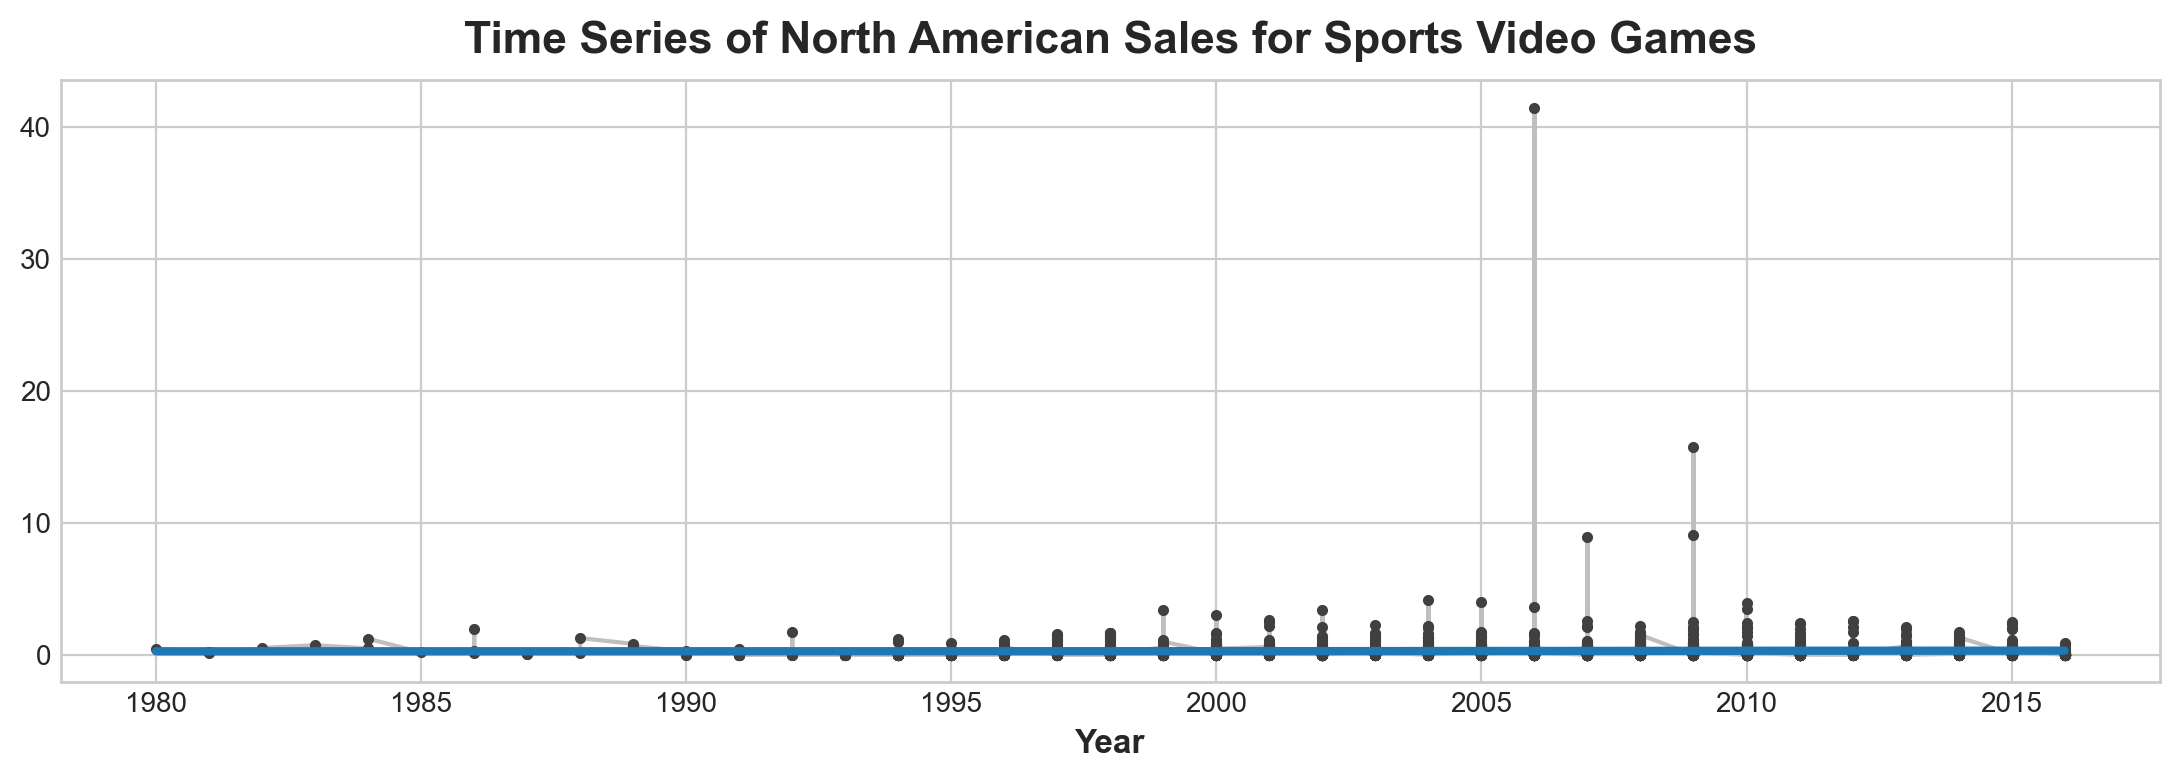

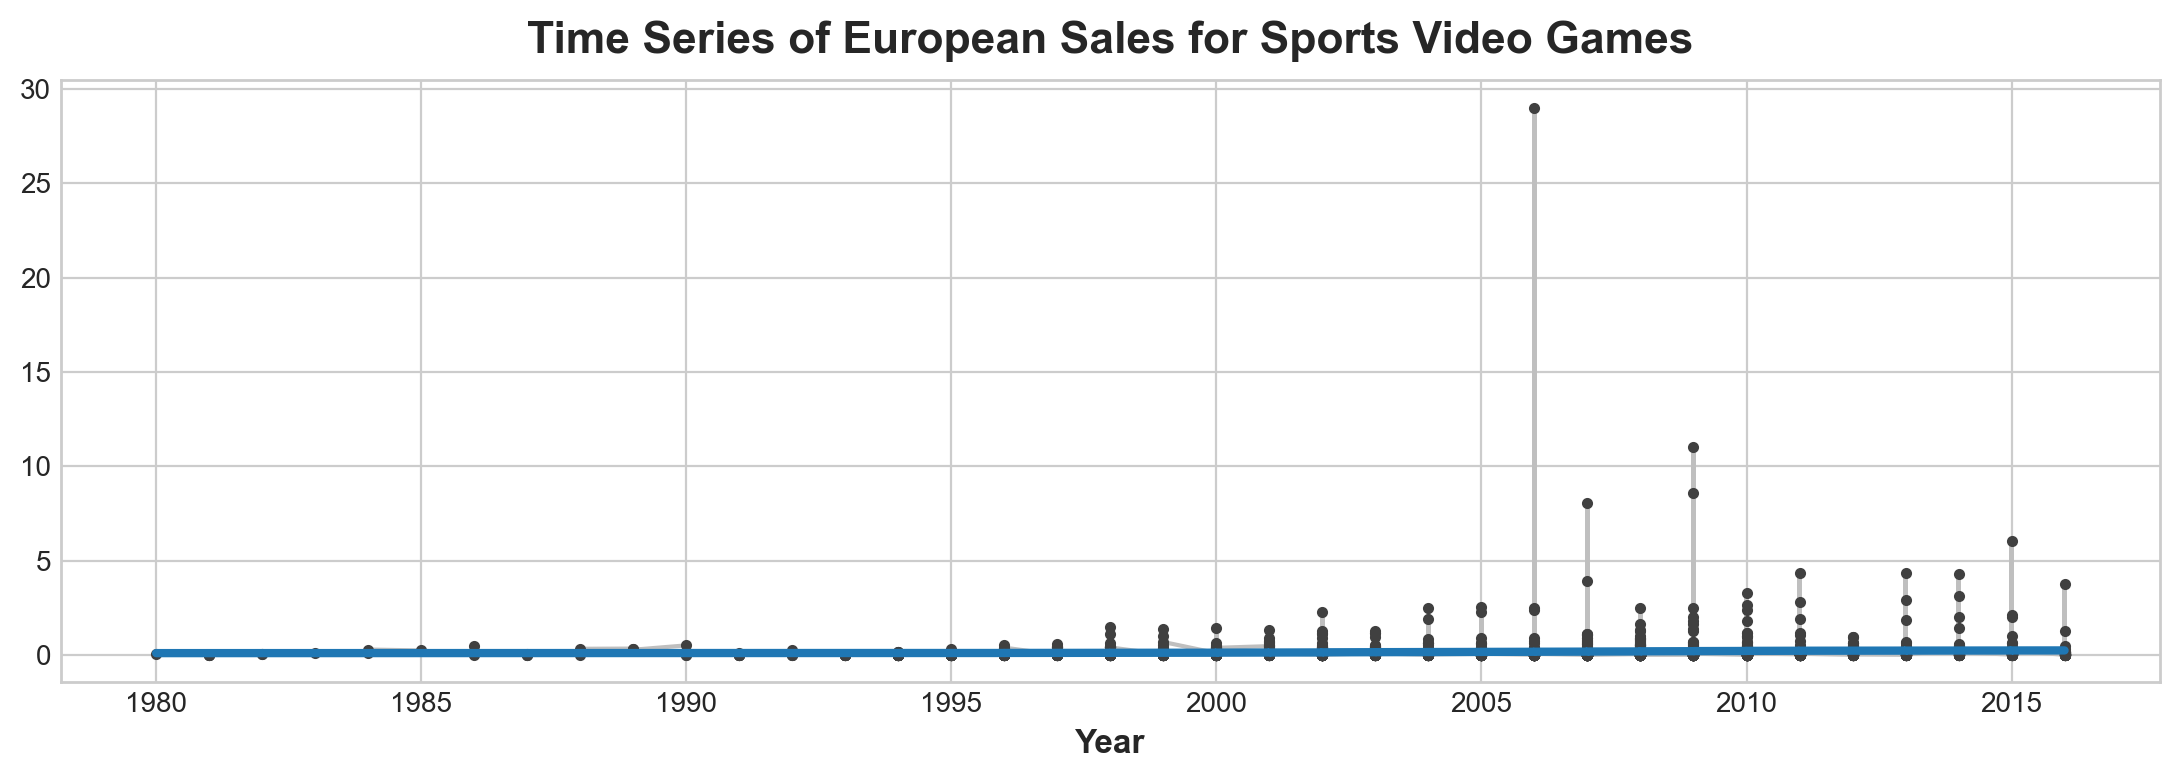

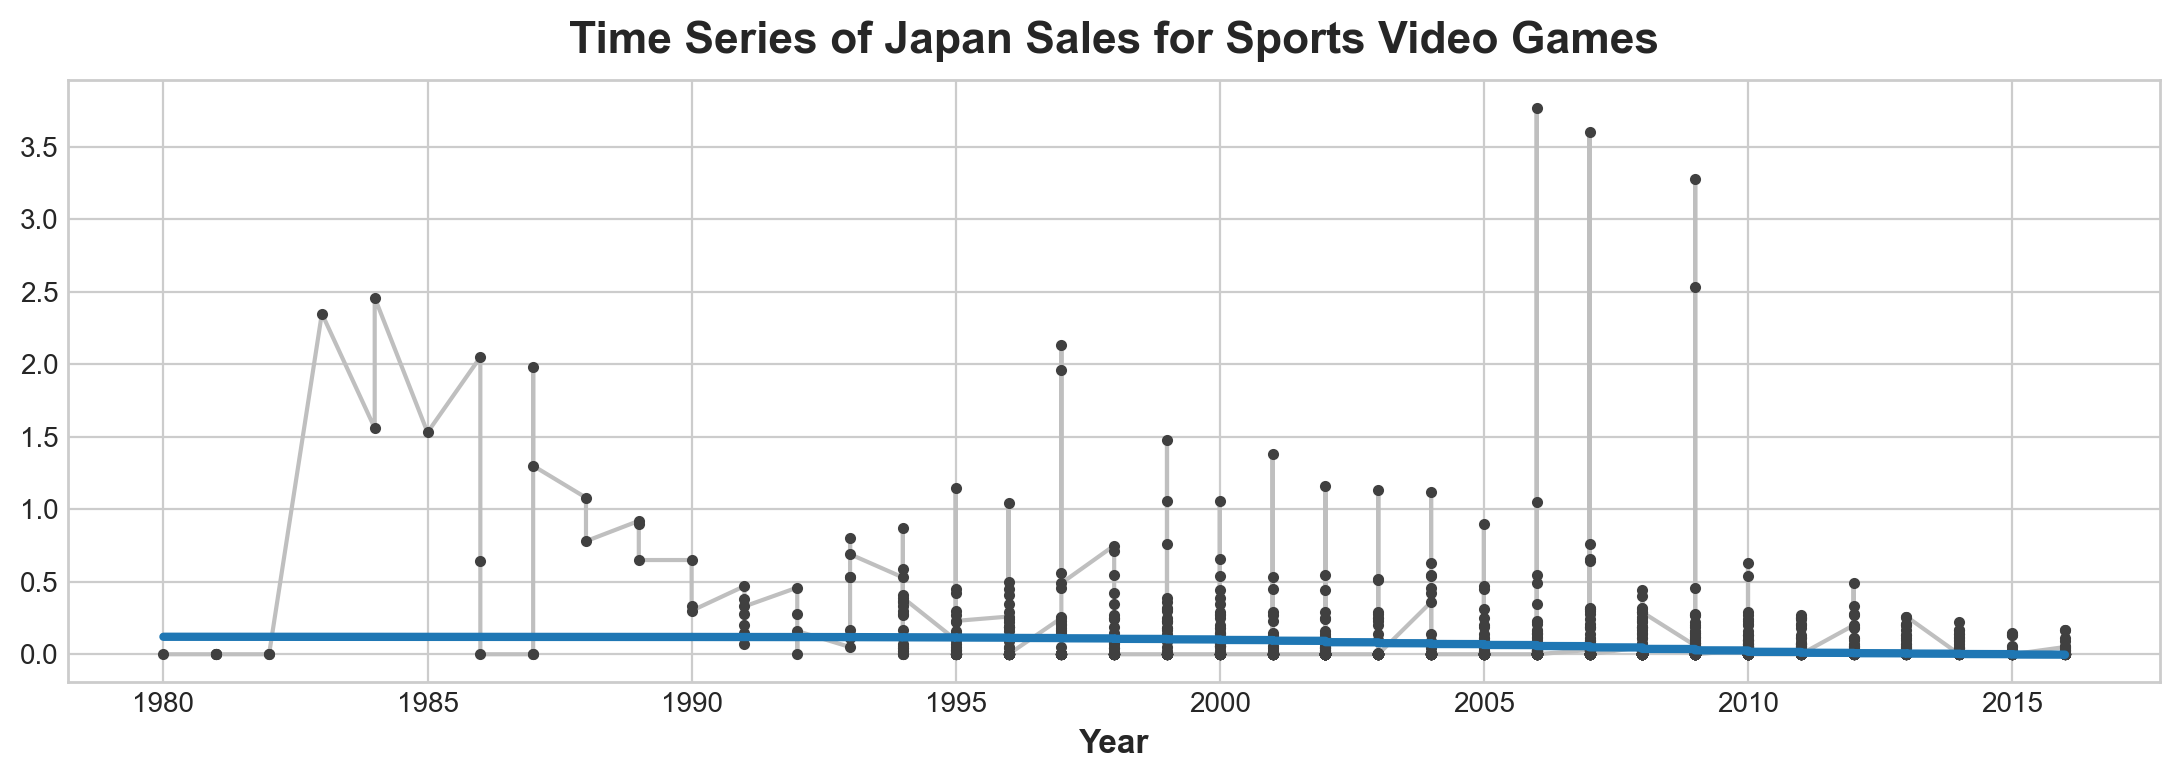

In [68]:
fig, ax_NA = plt.subplots()
ax_NA = y_sportsNA.plot(**plot_params)
ax_NA = yNA_sportspred.plot(ax=ax_NA, linewidth=3)
ax_NA.set_title('Time Series of North American Sales for Sports Video Games');

fig, ax_EU = plt.subplots()
ax_EU = y_sportsEU.plot(**plot_params)
ax_EU = yEU_sportspred.plot(ax=ax_EU, linewidth=3)
ax_EU.set_title('Time Series of European Sales for Sports Video Games');

fig, ax_JP = plt.subplots()
ax_JP = y_sportsJP.plot(**plot_params)
ax_JP = yJP_sportspred.plot(ax=ax_JP, linewidth=3)
ax_JP.set_title('Time Series of Japan Sales for Sports Video Games');

## Regional Sales of `Misc` Genre - Time Series with Linear Regression

In [69]:
miscGenre_timeDf_vgsales = video_game_sales_df.copy(deep=True)
miscGenre_timeDf_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [70]:
miscGenre_timeDf_vgsales = miscGenre_timeDf_vgsales.loc[miscGenre_timeDf_vgsales['Genre'] == 'Misc']
miscGenre_timeDf_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
68,69,Just Dance 2,Wii,2010,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
...,...,...,...,...,...,...,...,...,...,...,...
16211,16519,DJ Max Technika Tune,PSV,2012,Misc,CyberFront,0.00,0.00,0.01,0.00,0.01
16214,16522,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16218,16526,Style Book: Cinnamoroll,DS,2006,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16231,16539,Patrician IV: Gold Edition,PC,2011,Misc,Kalypso Media,0.00,0.01,0.00,0.00,0.01


In [71]:
# Drop columns to compare date and sales
miscGenre_timeDf_vgsales = miscGenre_timeDf_vgsales.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 
                                               'Other_Sales'
                                              ])
miscGenre_timeDf_vgsales

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
7,8,2006,14.03,9.20,2.93,29.02
15,16,2010,14.97,4.94,0.24,21.82
19,20,2005,4.75,9.26,4.16,20.22
60,61,2011,6.05,3.15,0.00,10.26
68,69,2010,5.84,2.89,0.01,9.52
...,...,...,...,...,...,...
16211,16519,2012,0.00,0.00,0.01,0.01
16214,16522,2014,0.00,0.00,0.01,0.01
16218,16526,2006,0.00,0.00,0.01,0.01
16231,16539,2011,0.00,0.01,0.00,0.01


In [72]:
# Set Index as 'Year' and sort from earliest to latest date
miscGenre_sorted = miscGenre_timeDf_vgsales.sort_values(by='Year')

miscGenre_timeDf_vgsales = miscGenre_sorted.set_index('Year')
miscGenre_timeDf_vgsales

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,,,,,
1980,6319,0.25,0.02,0.00,0.27
1980,6898,0.22,0.01,0.00,0.24
1980,1768,1.07,0.07,0.00,1.15
1980,1971,0.99,0.05,0.00,1.05
1982,2408,0.81,0.05,0.00,0.87
...,...,...,...,...,...
2016,15019,0.00,0.00,0.02,0.02
2016,15569,0.00,0.00,0.02,0.02
2016,4515,0.18,0.09,0.14,0.43


In [73]:
miscGenre_timeDf_vgsales['Year'] = np.arange(len(miscGenre_timeDf_vgsales.index))
miscGenre_timeDf_vgsales.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Year
Year,,,,,,
1980,6319,0.25,0.02,0.0,0.27,0
1980,6898,0.22,0.01,0.0,0.24,1
1980,1768,1.07,0.07,0.0,1.15,2
1980,1971,0.99,0.05,0.0,1.05,3
1982,2408,0.81,0.05,0.0,0.87,4


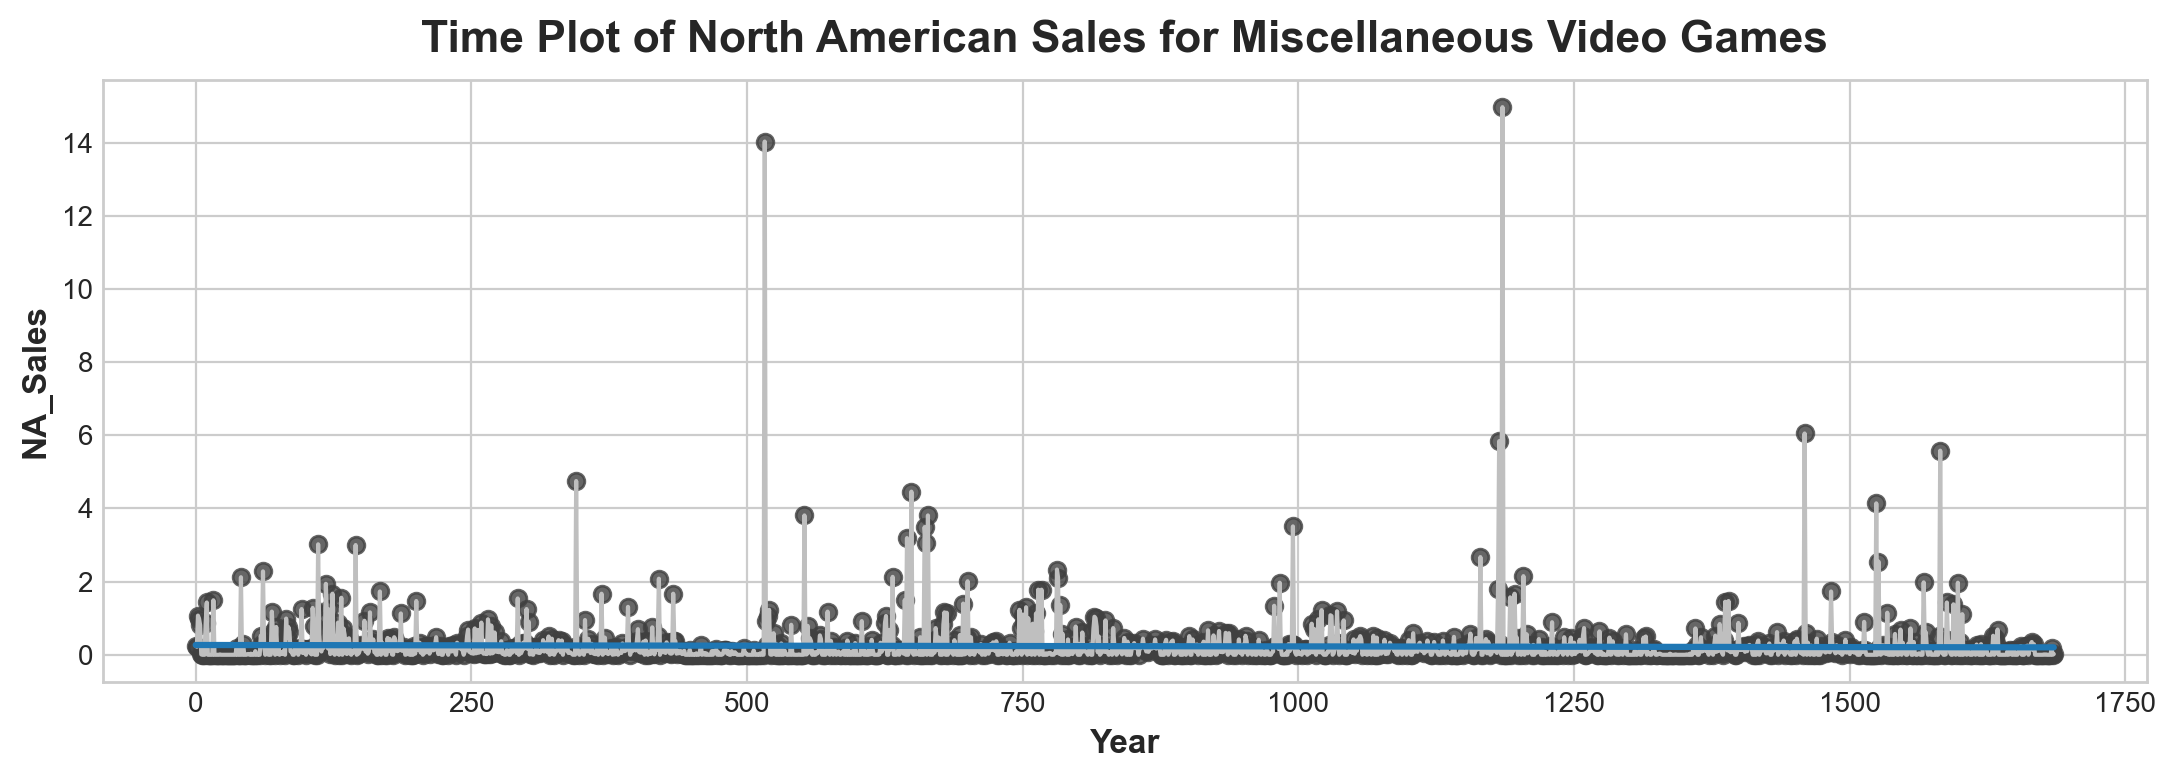

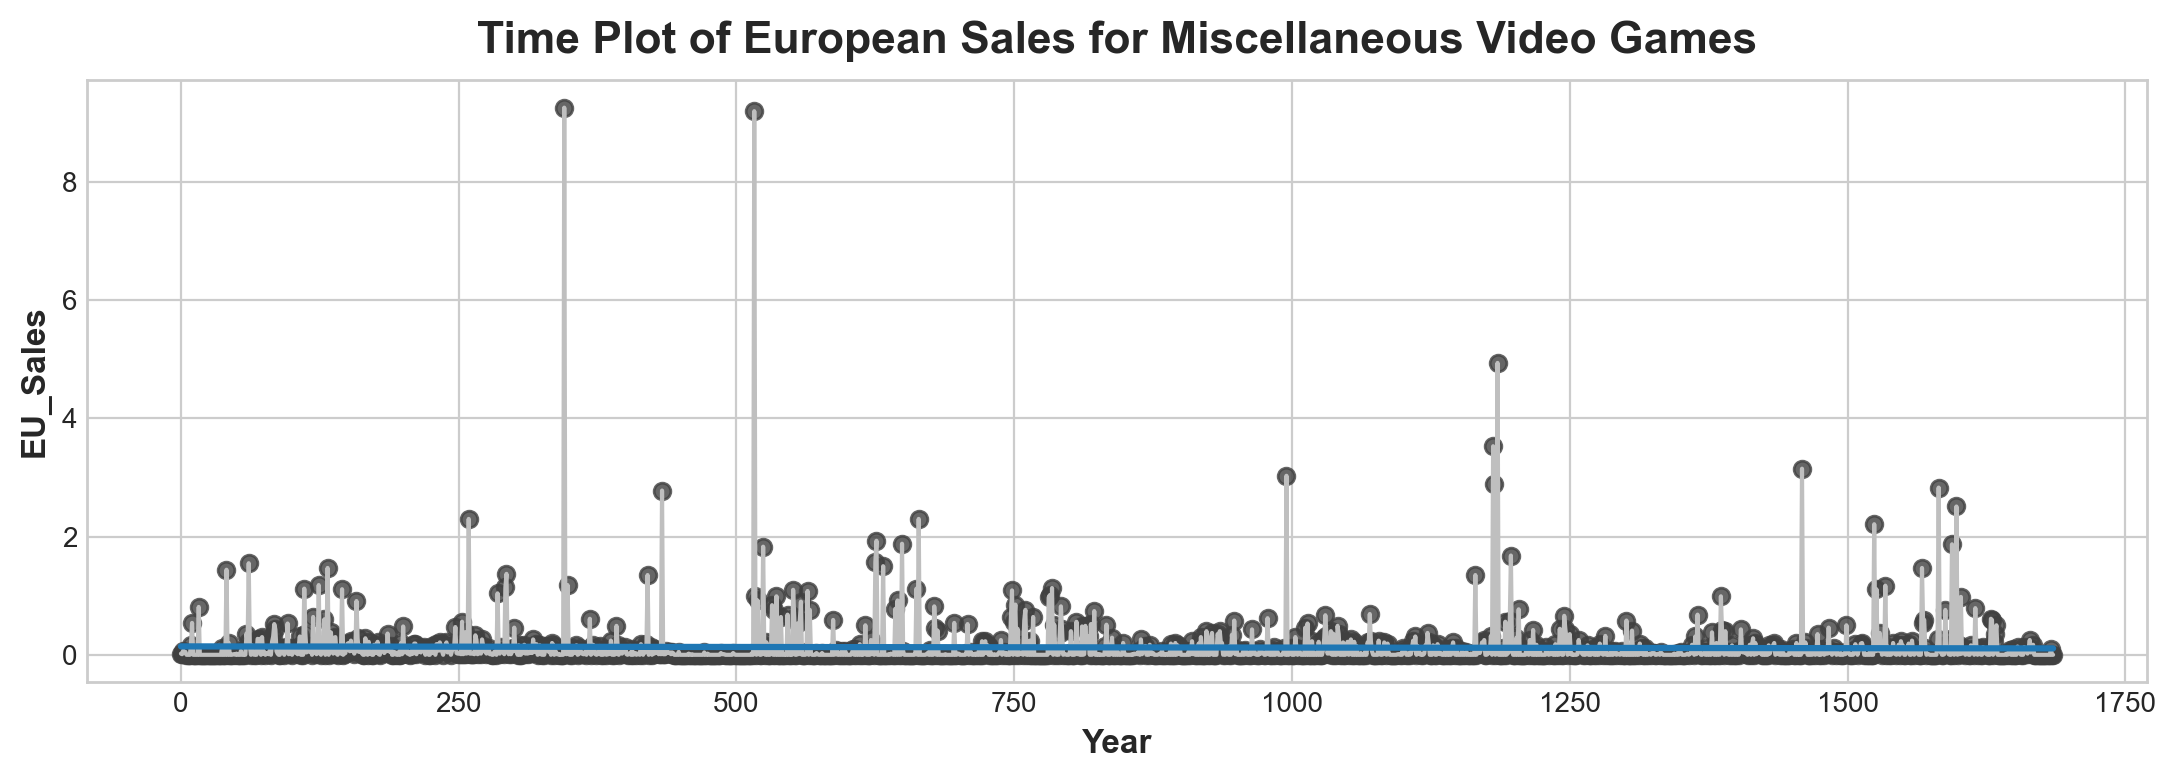

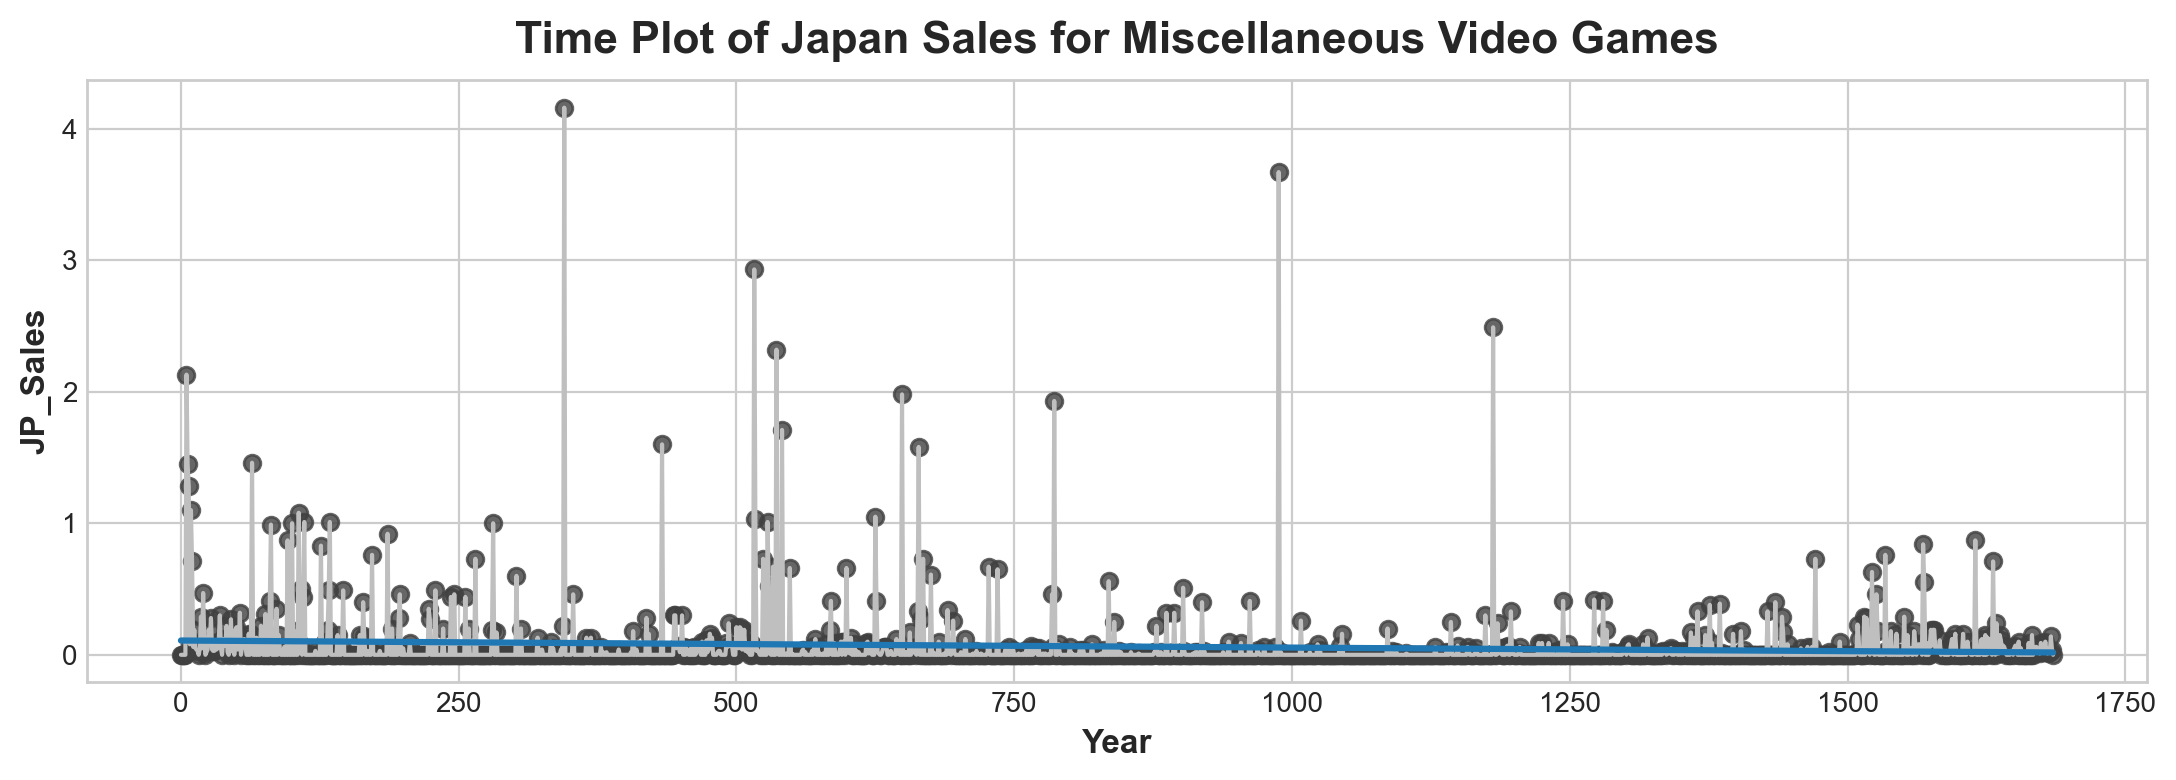

In [74]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

fig, ax_NA = plt.subplots()
ax_NA.plot('Year', 'NA_Sales', data=miscGenre_timeDf_vgsales, color='0.75')
ax_NA = sns.regplot(x='Year', y='NA_Sales', data=miscGenre_timeDf_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_NA.set_title('Time Plot of North American Sales for Miscellaneous Video Games');

fig, ax_EU = plt.subplots()
ax_EU.plot('Year', 'EU_Sales', data=miscGenre_timeDf_vgsales, color='0.75')
ax_EU = sns.regplot(x='Year', y='EU_Sales', data=miscGenre_timeDf_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_EU.set_title('Time Plot of European Sales for Miscellaneous Video Games');

fig, ax_JP = plt.subplots()
ax_JP.plot('Year', 'JP_Sales', data=miscGenre_timeDf_vgsales, color='0.75')
ax_JP = sns.regplot(x='Year', y='JP_Sales', data=miscGenre_timeDf_vgsales, ci=None, scatter_kws=dict(color='0.25'))
ax_JP.set_title('Time Plot of Japan Sales for Miscellaneous Video Games');

In [75]:
# Create features and targets for each region
X_miscNA = miscGenre_timeDf_vgsales.loc[:, ['Year']]  # features
y_miscNA = miscGenre_timeDf_vgsales.loc[:, 'NA_Sales']  # target

X_miscEU = miscGenre_timeDf_vgsales.loc[:, ['Year']]  # features
y_miscEU = miscGenre_timeDf_vgsales.loc[:, 'EU_Sales']  # target

X_miscJP = miscGenre_timeDf_vgsales.loc[:, ['Year']]  # features
y_miscJP = miscGenre_timeDf_vgsales.loc[:, 'JP_Sales']  # target

In [76]:
# Train the model for each region
miscModel_NA = LinearRegression()
miscModel_NA.fit(X_miscNA, y_miscNA)

miscModel_EU = LinearRegression()
miscModel_EU.fit(X_miscEU, y_miscEU)

miscModel_JP = LinearRegression()
miscModel_JP.fit(X_miscJP, y_miscJP)

LinearRegression()

In [77]:
# Make predictions for each region
yNA_miscPred = pd.Series(miscModel_NA.predict(X_miscNA), index=X_miscNA.index)

yEU_miscPred = pd.Series(miscModel_EU.predict(X_miscEU), index=X_miscEU.index)

yJP_miscPred = pd.Series(miscModel_JP.predict(X_miscJP), index=X_miscJP.index)

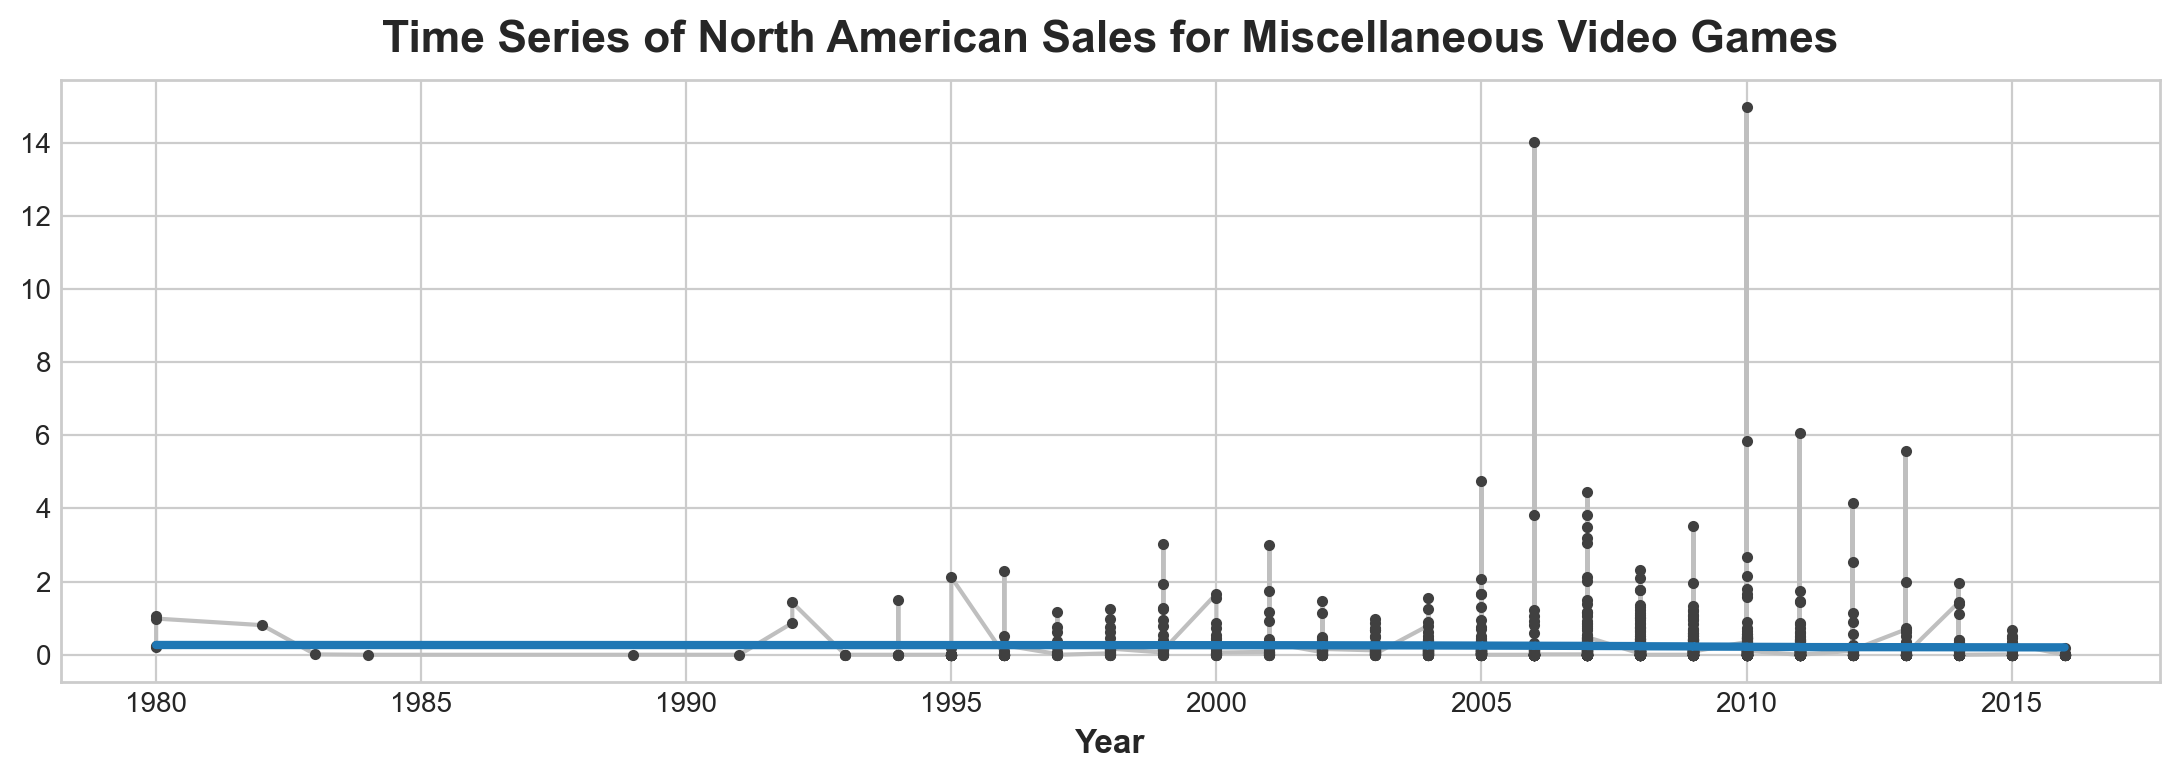

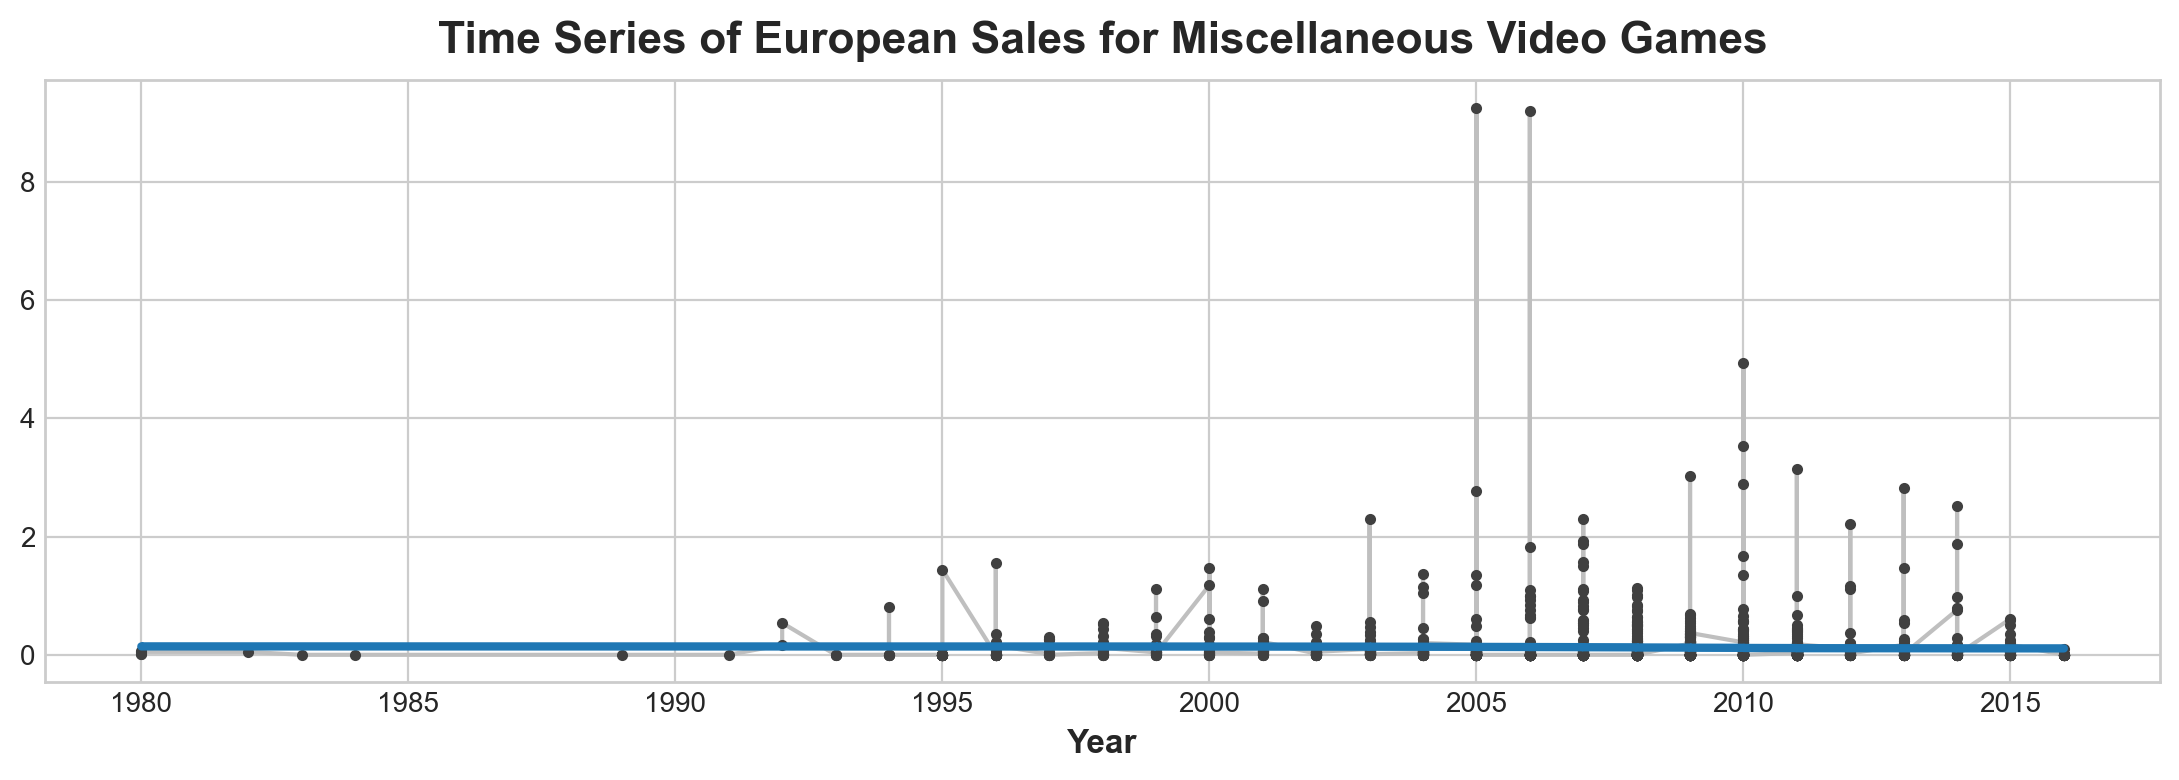

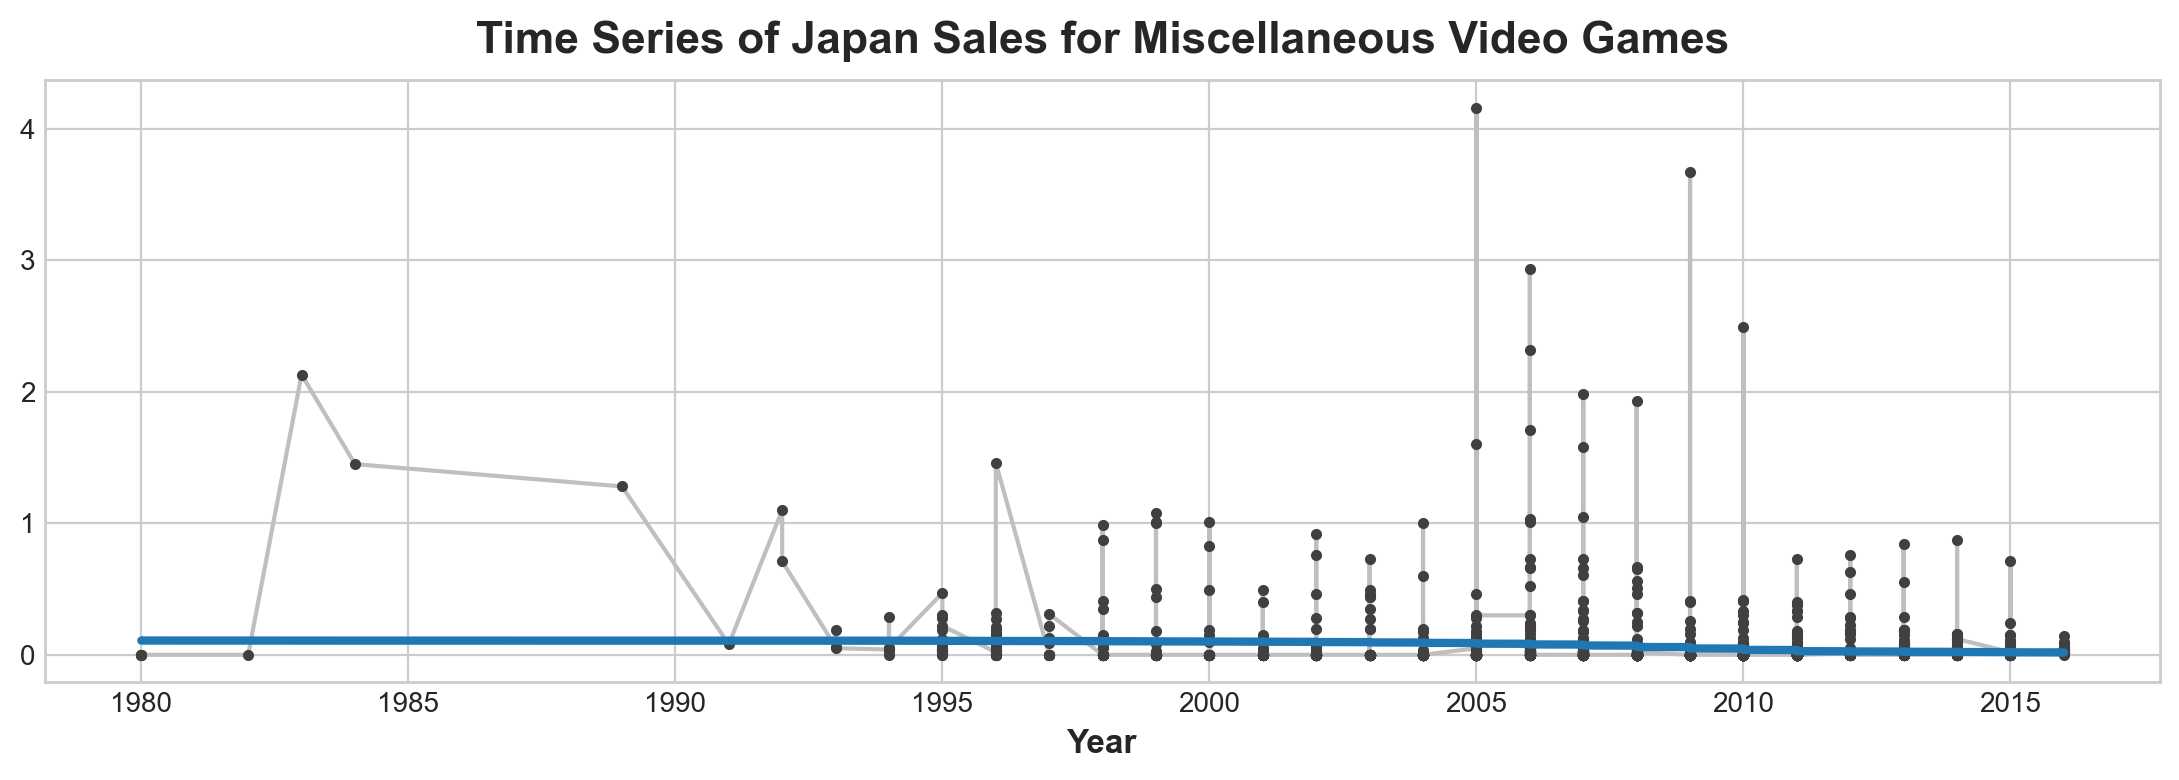

In [78]:
fig, ax_NA = plt.subplots()
ax_NA = y_miscNA.plot(**plot_params)
ax_NA = yNA_miscPred.plot(ax=ax_NA, linewidth=3)
ax_NA.set_title('Time Series of North American Sales for Miscellaneous Video Games');

fig, ax_EU = plt.subplots()
ax_EU = y_miscEU.plot(**plot_params)
ax_EU = yEU_miscPred.plot(ax=ax_EU, linewidth=3)
ax_EU.set_title('Time Series of European Sales for Miscellaneous Video Games');

fig, ax_JP = plt.subplots()
ax_JP = y_miscJP.plot(**plot_params)
ax_JP = yJP_miscPred.plot(ax=ax_JP, linewidth=3)
ax_JP.set_title('Time Series of Japan Sales for Miscellaneous Video Games');

## Logistic Regression 

In [79]:
# Determine what will be a 'Hit'; Sales > 100,000
cleaned_df.loc[cleaned_df['Global_Sales'] >= 0.10, 'Hit'] = 1
cleaned_df.loc[cleaned_df['Global_Sales'] < 0.10, 'Hit'] = 0

In [80]:
cleaned_df

,Year,Global_Sales,Platform_DS,Platform_GBA,Platform_GC,Platform_N64,Platform_Other,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Other,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Warner Bros. Interactive Entertainment,Hit
0,2006,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,1985,40.24,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,2008,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,2009,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,1996,31.37,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,2002,0.01,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
16287,2003,0.01,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
16288,2008,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
16289,2010,0.01,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0


In [81]:
y_logistic = cleaned_df['Hit']

X_logistic = cleaned_df.drop('Hit', axis=1)

In [82]:
# Train, test, split the data
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, random_state=37)

logistic_regression_model = LogisticRegression(random_state=37)
lr_model = logistic_regression_model.fit(X_train, y_train)

In [83]:
# Make a prediction using the testing data
# Generate training predictions
training_predictions = lr_model.predict(X_train)
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9665247994761826
Testing Data Score: 0.9621900319175055


In [84]:
# Print the accuracy and balanced_accuracy score of the model
print(f"Accuracy Score: {accuracy_score(y_test, logistic_regression_model.predict(X_test))}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, logistic_regression_model.predict(X_test))}")

Accuracy Score: 0.9621900319175055
Balanced Accuracy Score: 0.9642322759077981


In [85]:
# Create and save the confusion matrix for the TRAINING data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[4214  108]
 [ 301 7595]]


In [86]:
# Create and save the confusion matrix for the TESTING data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[1304   40]
 [ 114 2615]]


In [87]:
# Create and save the TRAINING classification report
bal_training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(bal_training_report)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      4322
         1.0       0.99      0.96      0.97      7896

    accuracy                           0.97     12218
   macro avg       0.96      0.97      0.96     12218
weighted avg       0.97      0.97      0.97     12218



In [88]:
# Create and save the TESTING classification report - testing as a balanced set 
bal_testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(bal_testing_report)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1344
         1.0       0.98      0.96      0.97      2729

    accuracy                           0.96      4073
   macro avg       0.95      0.96      0.96      4073
weighted avg       0.96      0.96      0.96      4073



In [89]:
# Create and save the TRAINING classification report - testing as an imbalanced set 
imbal_training_report = classification_report_imbalanced(y_train, training_predictions)

print(imbal_training_report)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.93      0.98      0.96      0.95      0.97      0.94      4322
        1.0       0.99      0.96      0.98      0.97      0.97      0.94      7896

avg / total       0.97      0.97      0.97      0.97      0.97      0.94     12218



In [90]:
# Create and save the TESTING classification report - testing as an imbalanced set 
imbal_testing_report = classification_report_imbalanced(y_test, testing_predictions)

print(imbal_testing_report)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      0.97      0.96      0.94      0.96      0.93      1344
        1.0       0.98      0.96      0.97      0.97      0.96      0.93      2729

avg / total       0.96      0.96      0.97      0.96      0.96      0.93      4073



In [91]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0.0, 7896), (1.0, 7896)]


In [92]:
# Count the distinct values of the resampled labels data
y_train_ros.value_counts()

0.0    7896
1.0    7896
Name: Hit, dtype: int64

In [93]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model_ros = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using resampled training data
lr_model_ros = logistic_regression_model_ros.fit(X_train_ros, y_train_ros)

In [94]:
# Make a prediction using the testing data
# Generate training predictions
training_predictions_ros = lr_model_ros.predict(X_train_ros)
print(f"Training Data Score: {logistic_regression_model_ros.score(X_train, y_train)}")

# Generate testing predictions
testing_predictions_ros = logistic_regression_model_ros.predict(X_test)
print(f"Testing Data Score: {logistic_regression_model_ros.score(X_test, y_test)}")

Training Data Score: 0.9312489769192994
Testing Data Score: 0.9270807758409035


In [95]:
# Print the accuracy and balanced_accuracy score of the model 
print(f"Accuracy Score: {accuracy_score(y_test, logistic_regression_model_ros.predict(X_test))}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, logistic_regression_model_ros.predict(X_test))}")

Accuracy Score: 0.9270807758409035
Balanced Accuracy Score: 0.938221009134691


In [96]:
# Create and save the confusion matrix for the testing data
test_matrix_ros = confusion_matrix(y_test, testing_predictions_ros)

# Print the confusion matrix for the testing data
print(test_matrix_ros)

[[1305   39]
 [ 258 2471]]


In [97]:
# Print the classification report for the TRAINING model
training_report_ros = classification_report(y_train_ros, training_predictions_ros)

# Print the training classification report
print(training_report_ros)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7896
         1.0       0.97      0.91      0.94      7896

    accuracy                           0.94     15792
   macro avg       0.94      0.94      0.94     15792
weighted avg       0.94      0.94      0.94     15792



In [98]:
# Print the classification report for the TESTING model
testing_report_ros = classification_report(y_test, testing_predictions_ros)

# Print the testing classification report
print(testing_report_ros)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1344
         1.0       0.98      0.91      0.94      2729

    accuracy                           0.93      4073
   macro avg       0.91      0.94      0.92      4073
weighted avg       0.94      0.93      0.93      4073



## Lasso Regression 

In [99]:
# Create a model with scikit-learn
lasso_model = Lasso(alpha=1.0)

In [100]:
# Fit the data into the model
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [101]:
# Make predictions using the X training set
y_pred_train = lasso_model.predict(X_train_scaled)
y_pred_train

array([0.64625962, 0.64625962, 0.64625962, ..., 0.64625962, 0.64625962,
       0.64625962])

In [102]:
# Make predictions using the X testing set
y_pred_test = lasso_model.predict(X_test_scaled)
y_pred_test

array([0.64625962, 0.64625962, 0.64625962, ..., 0.64625962, 0.64625962,
       0.64625962])

In [103]:
# Compute the metrics for the linear regression model
score_test = lasso_model.score(X_test_scaled, y_test, sample_weight=None)
score_train = lasso_model.score(X_train_scaled, y_train, sample_weight=None)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)


# Print relevant metrics.

print(f"The training score is {score_train}.")
print(f"The testing score is {score_test}.")

print(f"The training r2 is {r2_train}.")
print(f"The testing r2 is {r2_test}.")

The training score is 0.0.
The testing score is -0.002553933214703319.
The training r2 is 0.0.
The testing r2 is -0.002553933214703319.


## Random Forest

In [104]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [105]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [106]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [107]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [108]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,775,569
Actual 1,534,2195


Accuracy Score : 0.7291922415909649
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.58      0.58      1344
         1.0       0.79      0.80      0.80      2729

    accuracy                           0.73      4073
   macro avg       0.69      0.69      0.69      4073
weighted avg       0.73      0.73      0.73      4073



In [109]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance - display top 10 features
top_features = (sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))[:10]
top_features

[(0.3622336349441718, 'Year'),
 (0.08803358955731591, 'Publisher_Other'),
 (0.03823718746980054, 'Genre_Adventure'),
 (0.03556679222251203, 'Platform_PC'),
 (0.023094752135316973, 'Genre_Misc'),
 (0.02190410635857002, 'Genre_Sports'),
 (0.02108213285379649, 'Genre_Role-Playing'),
 (0.019263507952469516, 'Publisher_Electronic Arts'),
 (0.019162670410595942, 'Genre_Shooter'),
 (0.018021518857201425, 'Publisher_Namco Bandai Games')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

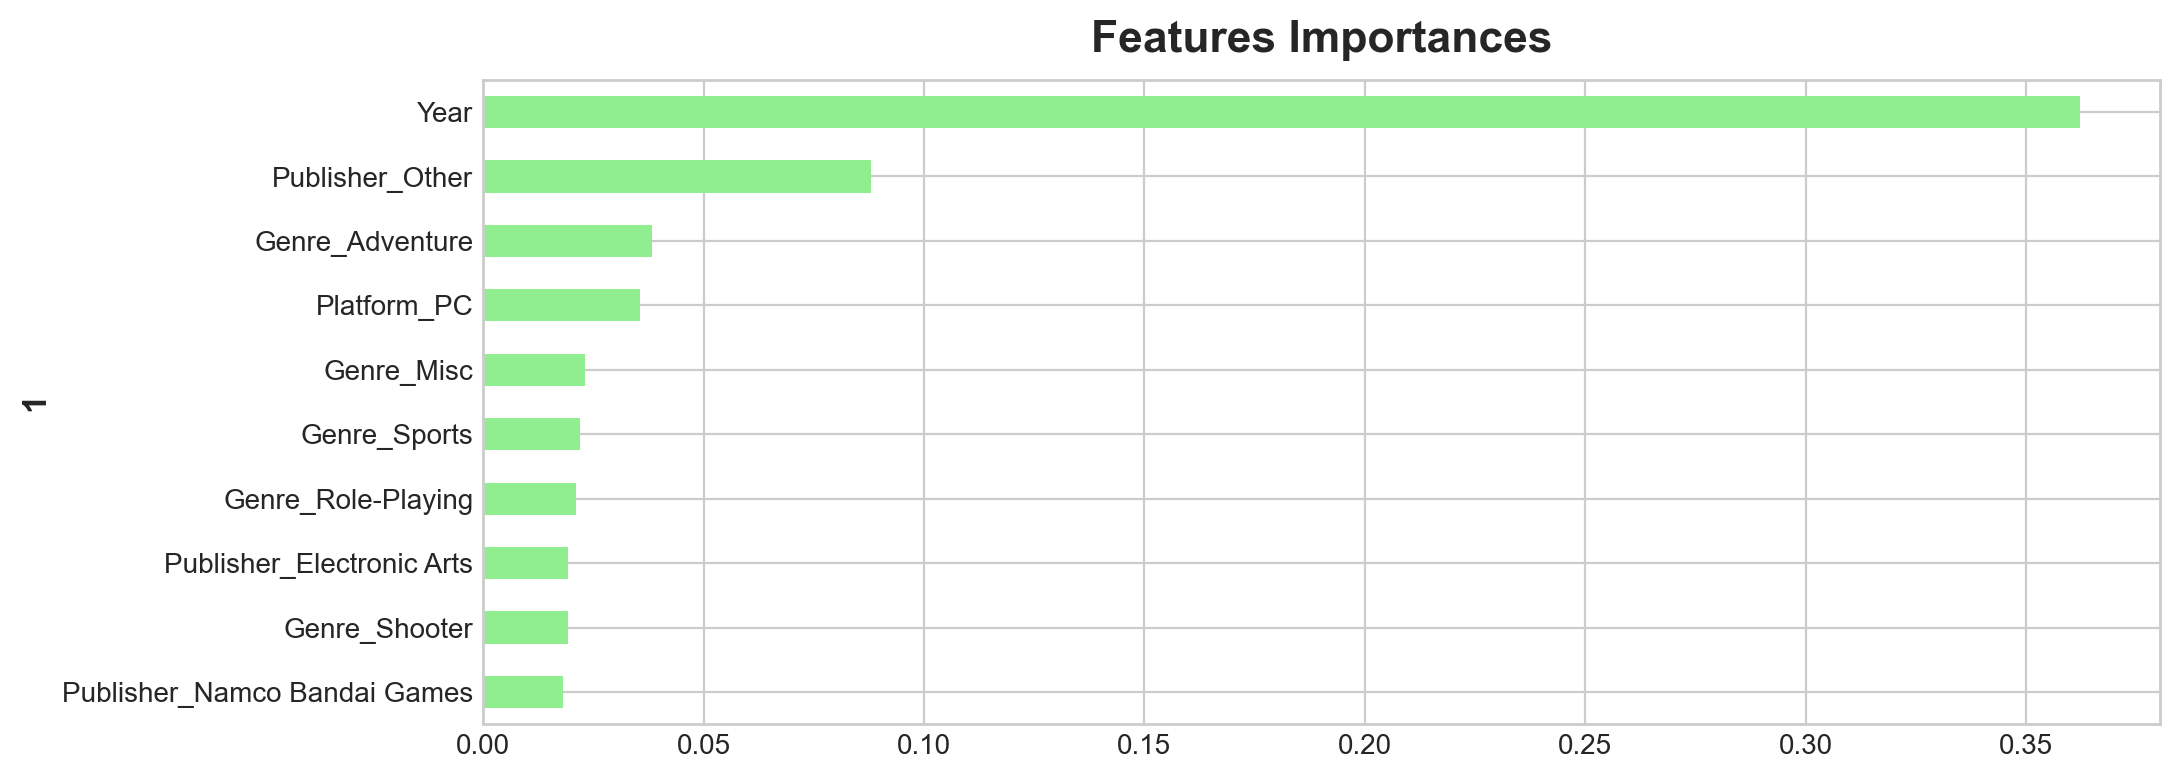

In [110]:
# Visualize the features by importance
importances_df = pd.DataFrame(top_features)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)